In [23]:
import numpy as np
import math as m
from sympy import *
#from sympy.abc import x
import pylab as py
from JSAnimation import IPython_display
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

In [24]:
print 'Enter number of segments'
n = int(raw_input()) #кол-во отрезков
print 'Enter ends of segment'
a , b = raw_input().split() #отрезок
a = float(a)
b = float(b)
h = (b - a) / n

Enter number of segments
1000
Enter ends of segment
-1 1


$$
\frac{\partial \vec U}{\partial t} + A \frac{\partial \vec U}{\partial x} = 0
$$

Enter A

In [25]:
A = np.array([[0,-1], [-1, 0]])
lam, OMEGA = LA.eig(A)
LAMBDA = np.array([[lam[0], 0], [0, lam[1]]])
print 'OMEGA =', OMEGA
print 'LAMBDA =', LAMBDA
OMEGA_ = LA.inv(OMEGA)

OMEGA = [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
LAMBDA = [[ 1.  0.]
 [ 0. -1.]]


In [26]:
# tau = h / c *(X), такое что c*tau/h < 1
print 'Enter X for tau'
X = float(raw_input())

Enter X for tau
0.9


In [28]:
def f(x):
    if (a + 0.4*(b-a) <= x <= a + 0.6*(b-a)):
        return 1
    else:
        return 0


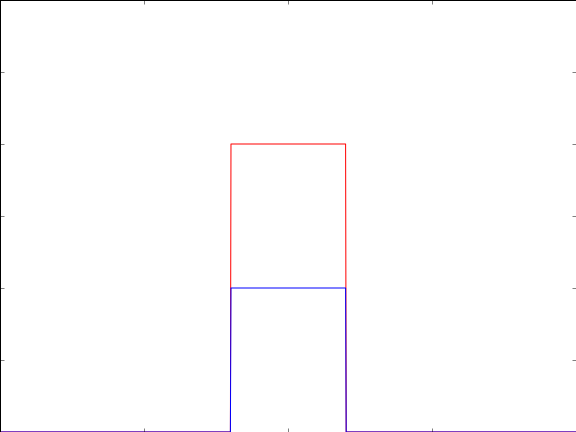
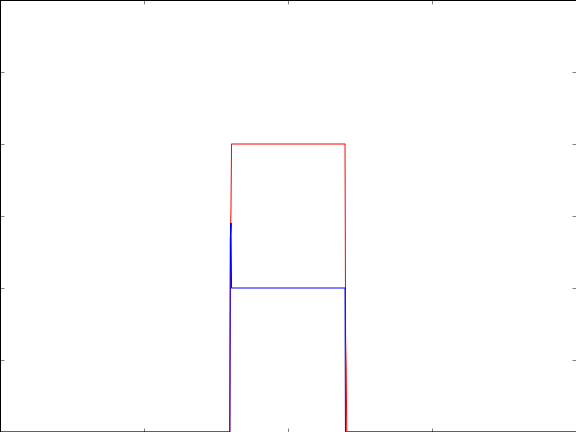
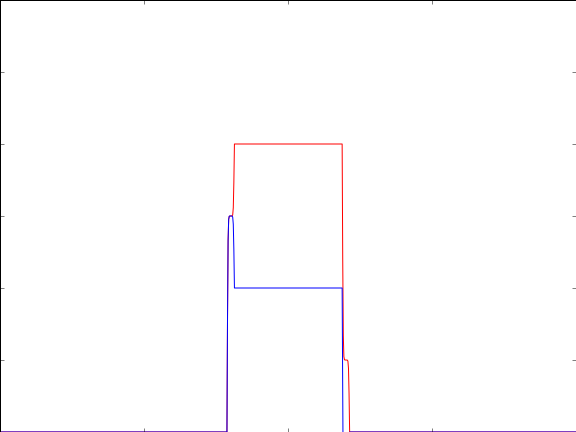
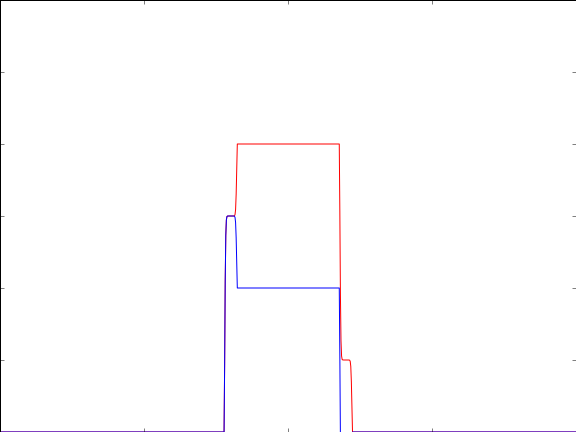
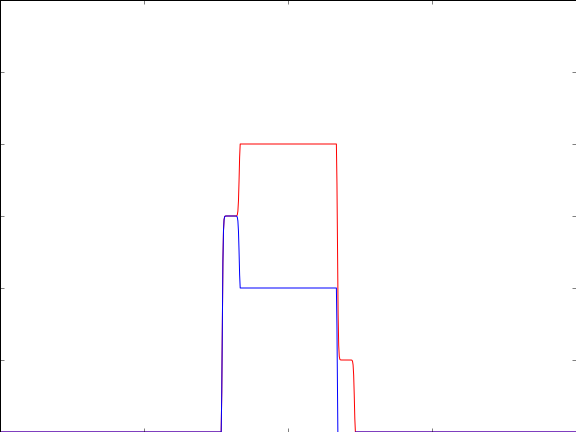
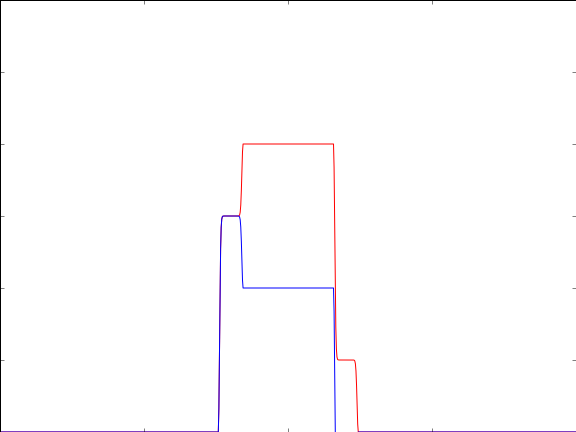
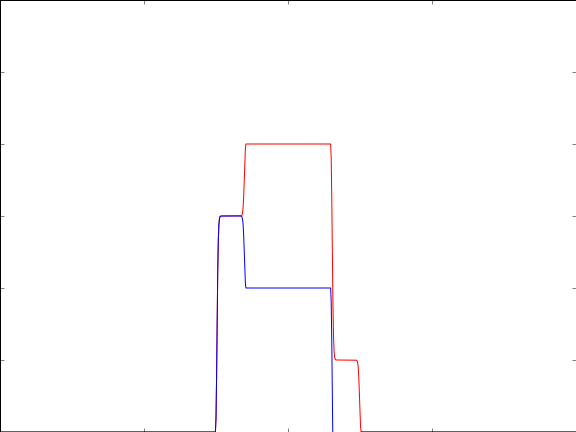
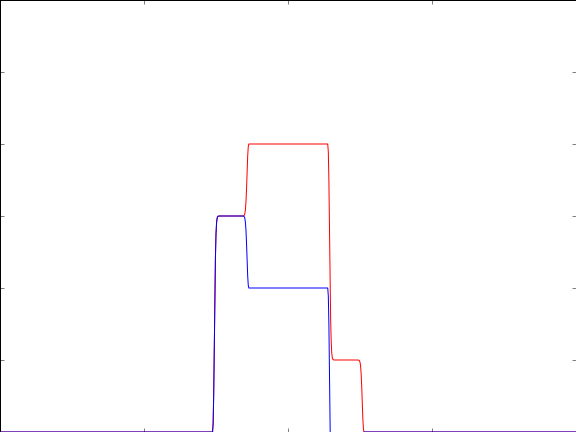
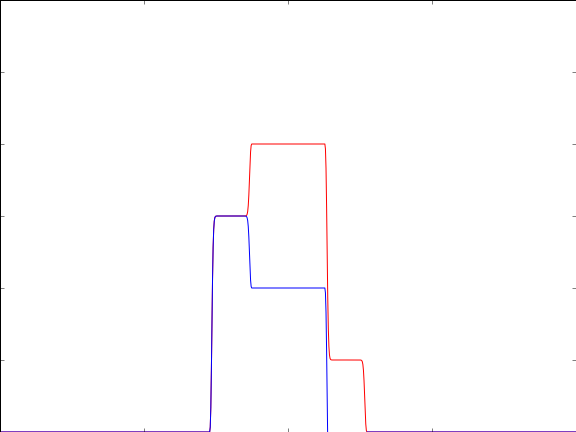
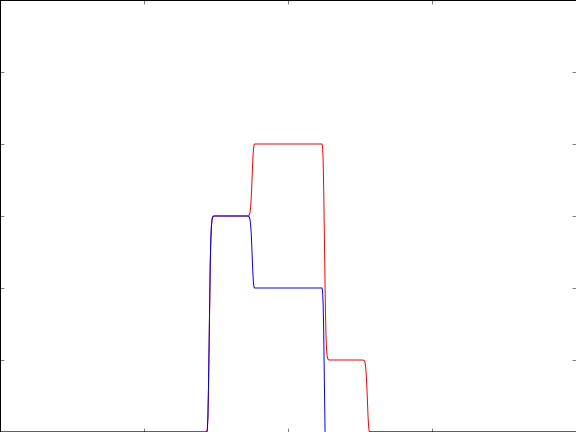
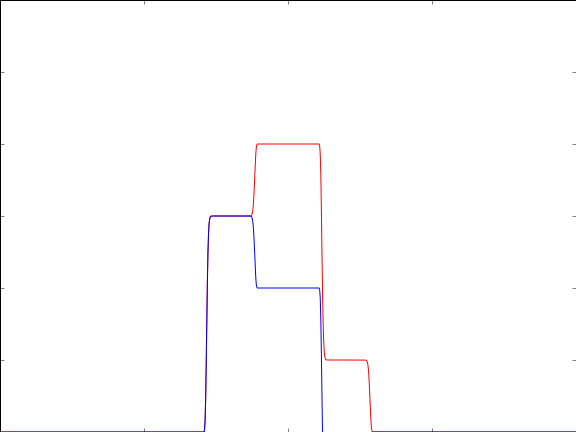
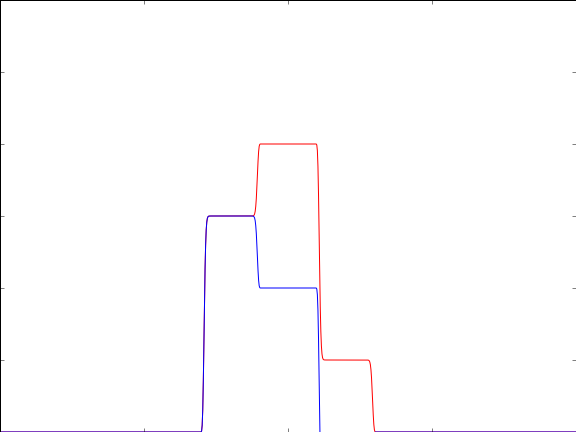
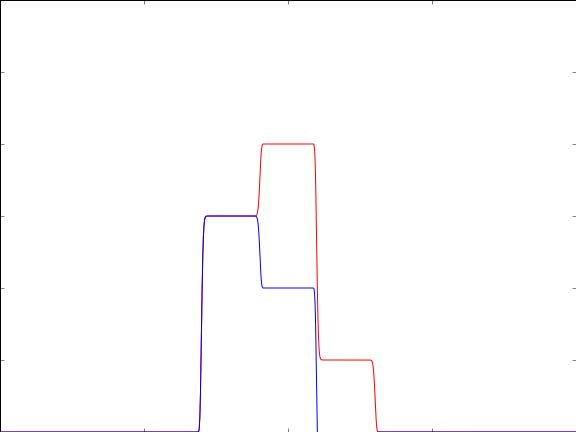
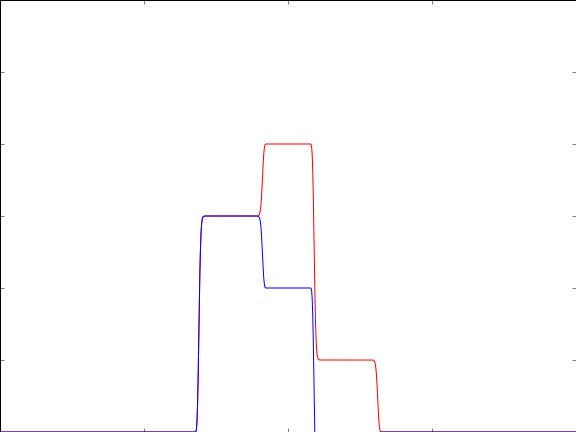
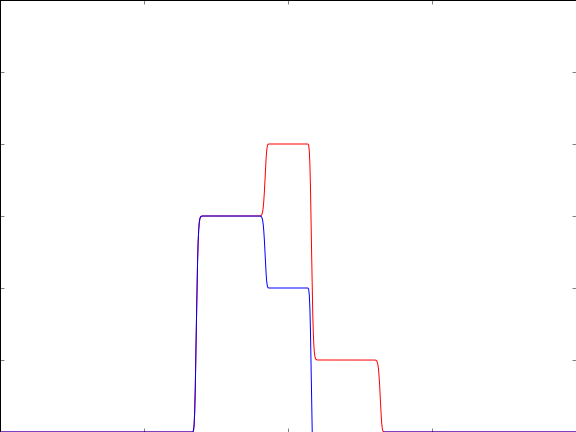
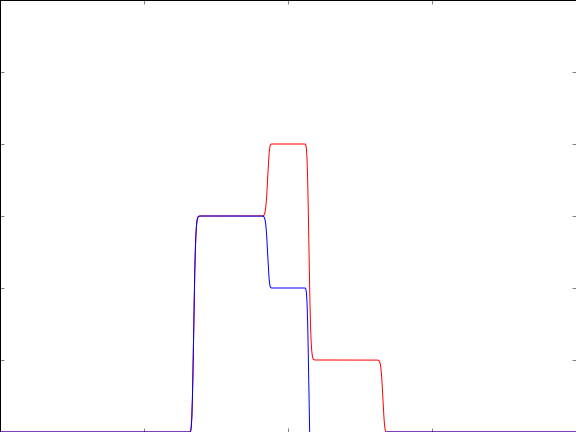
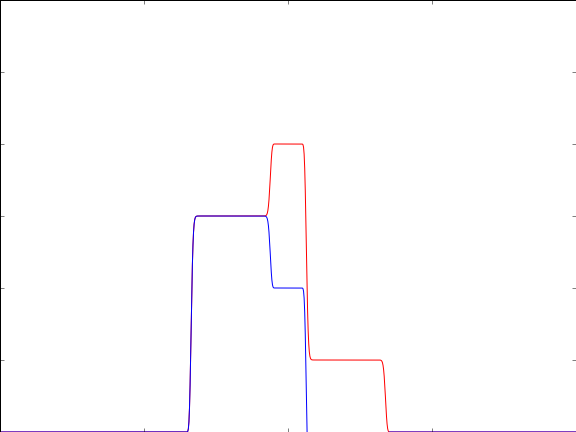
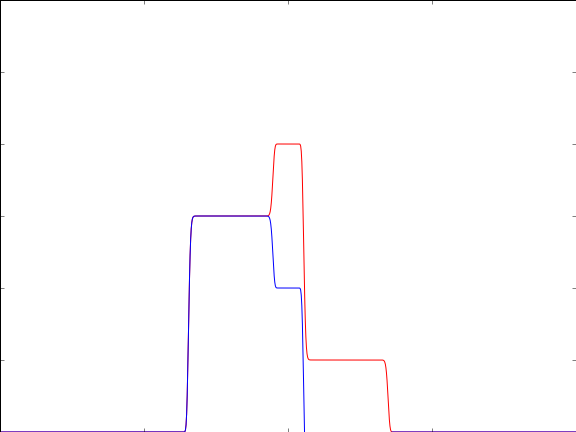
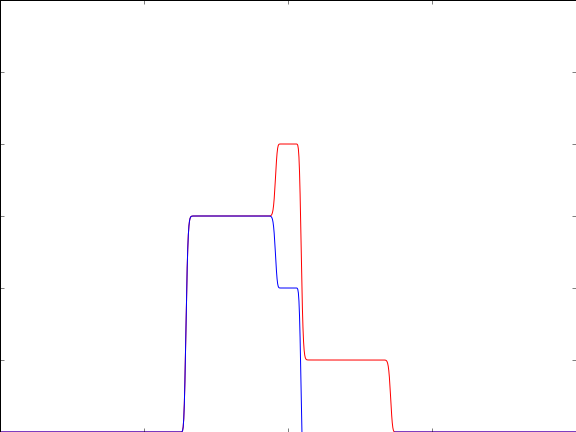
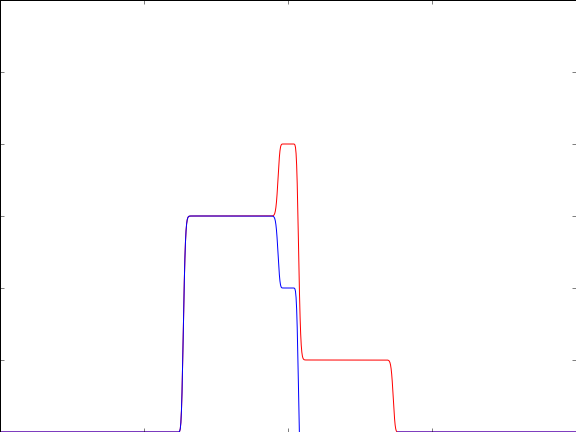
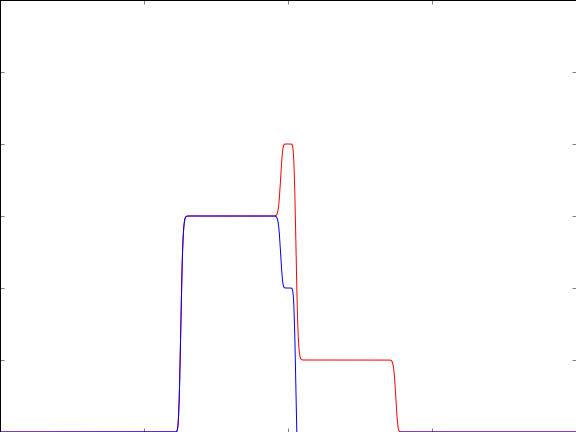
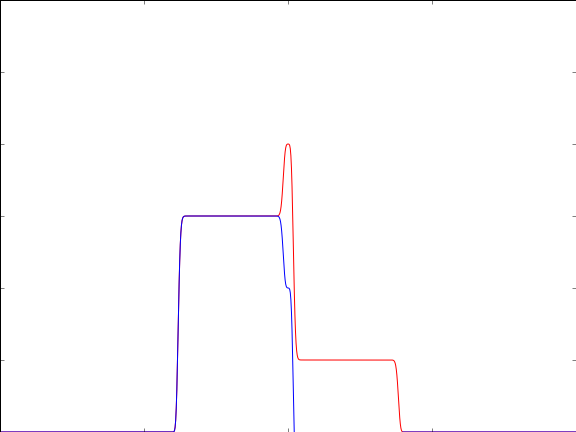
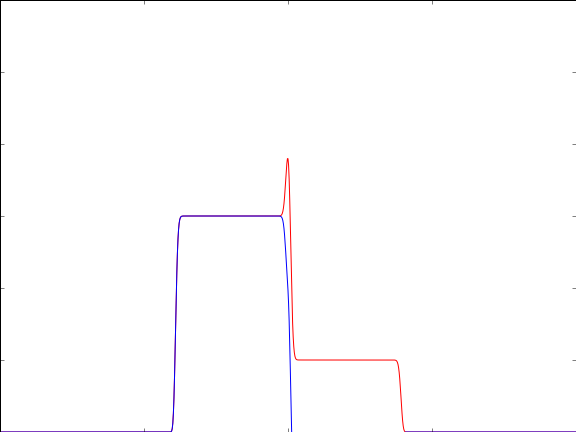
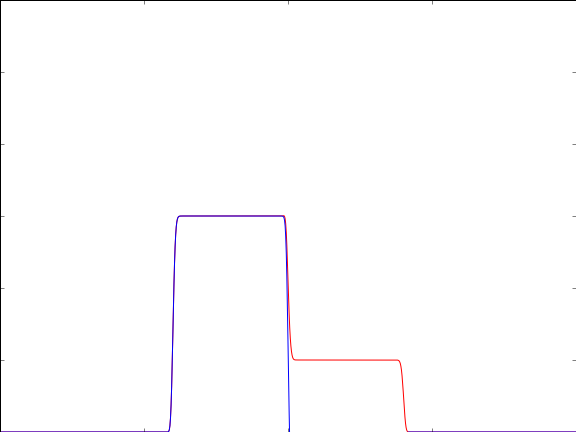
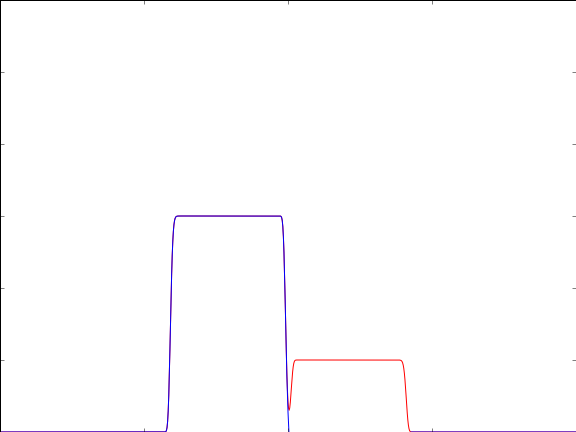
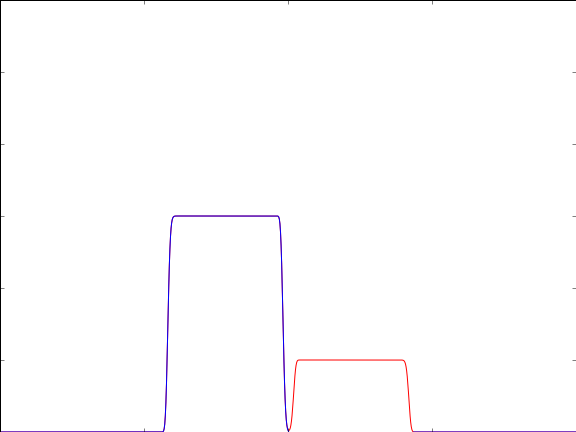
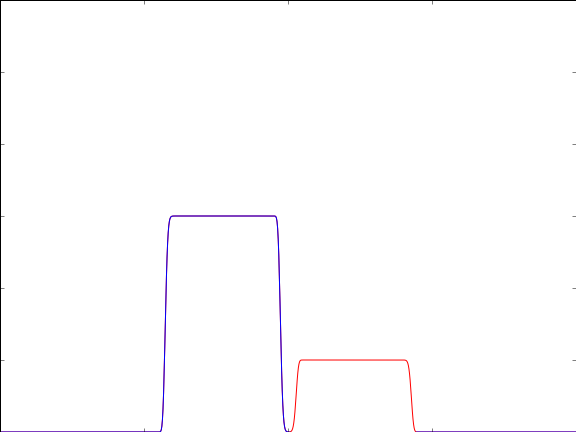
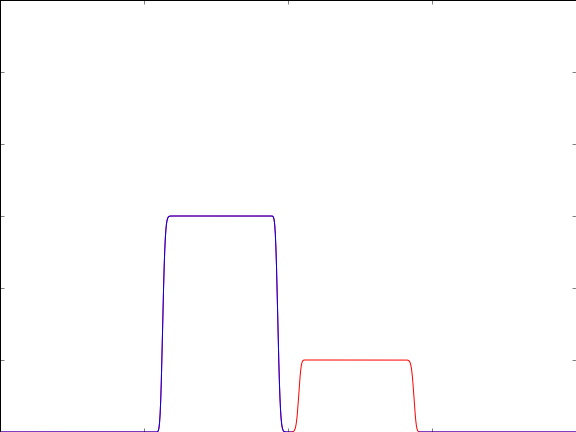
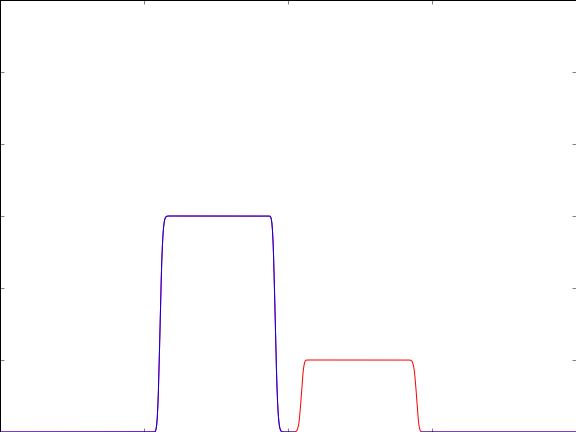
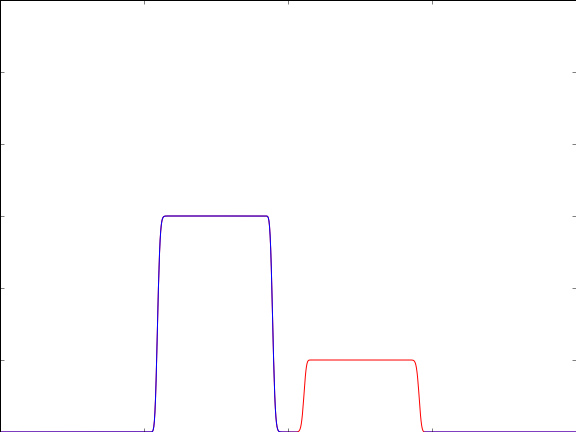
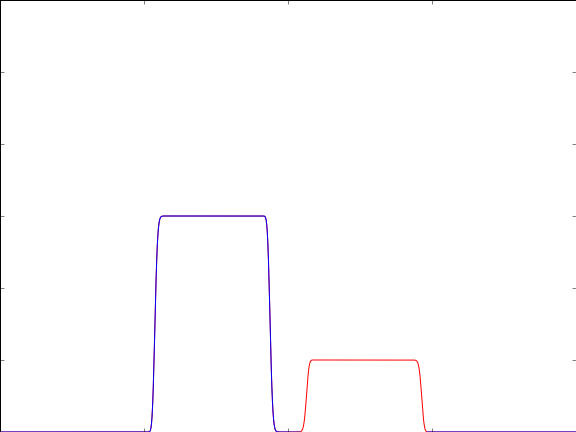
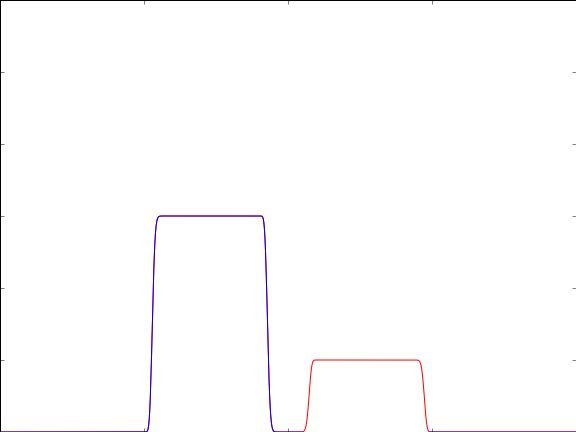
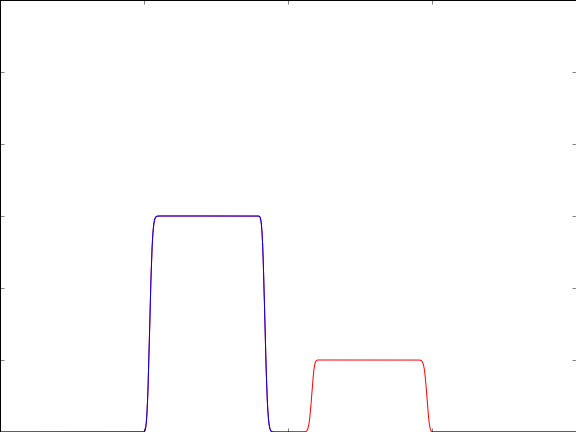
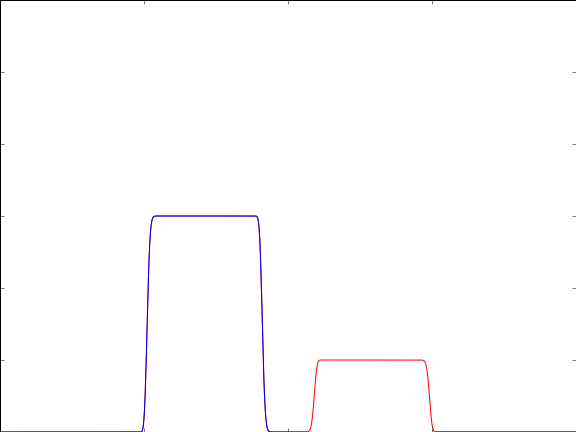
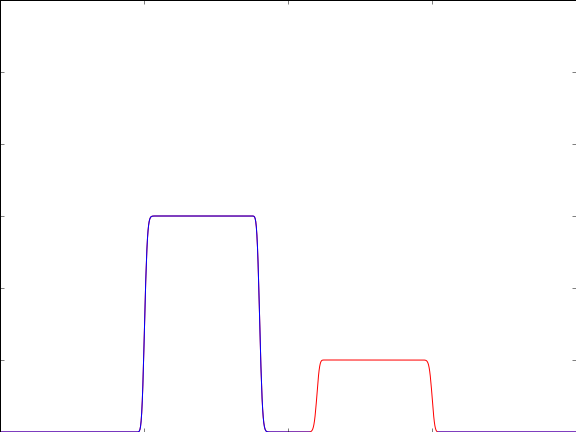
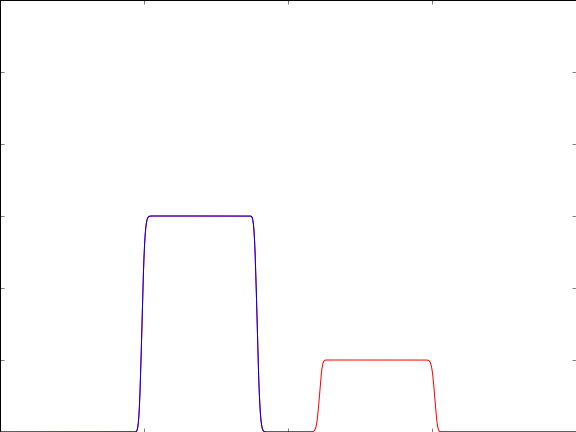
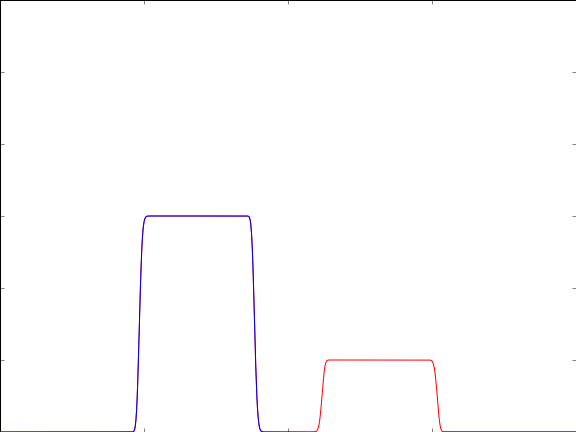
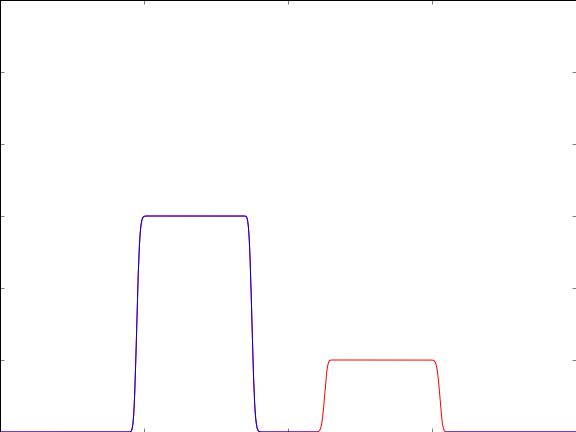
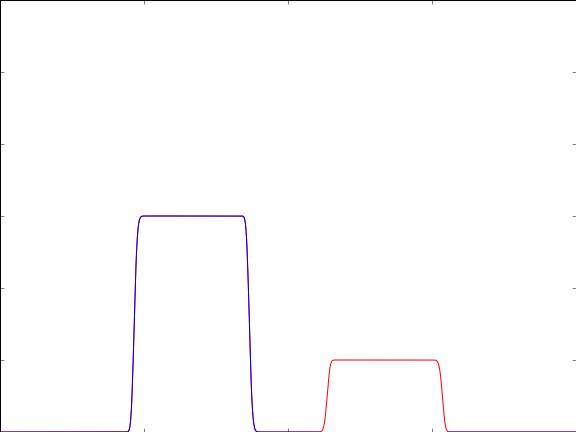
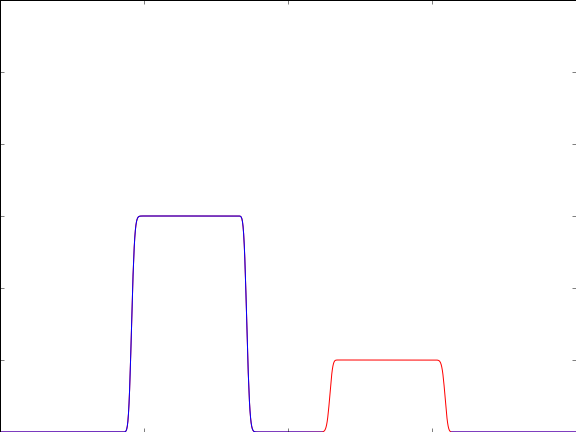
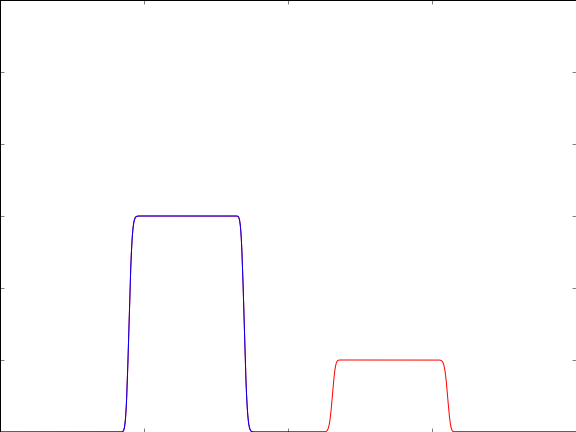
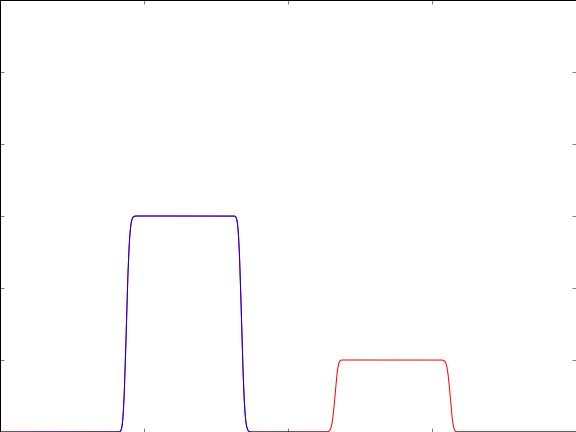
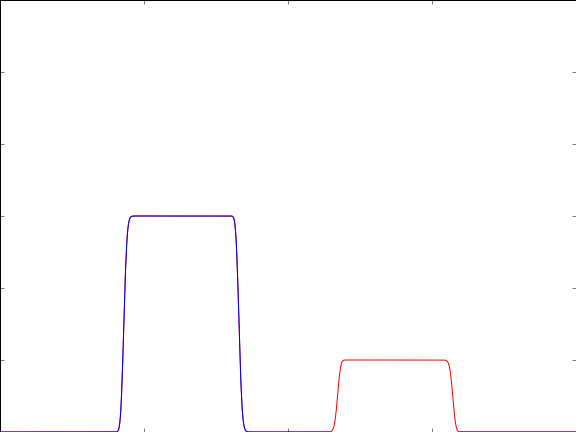
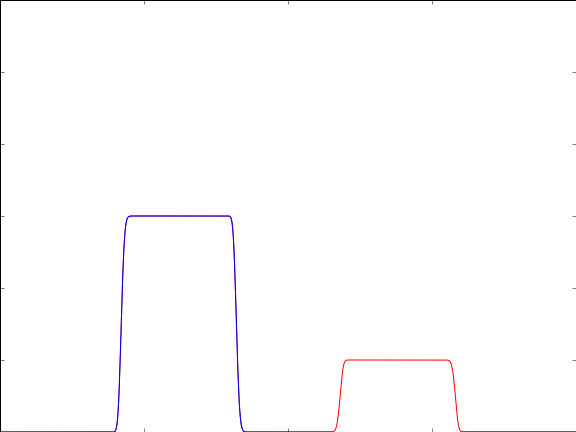
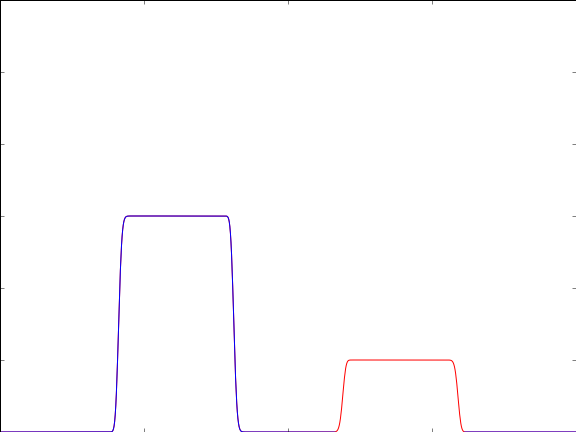
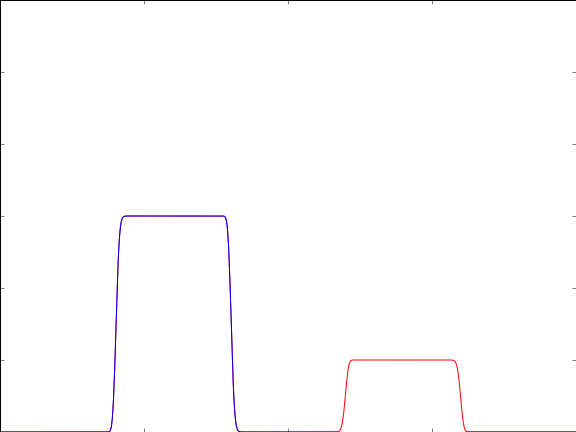
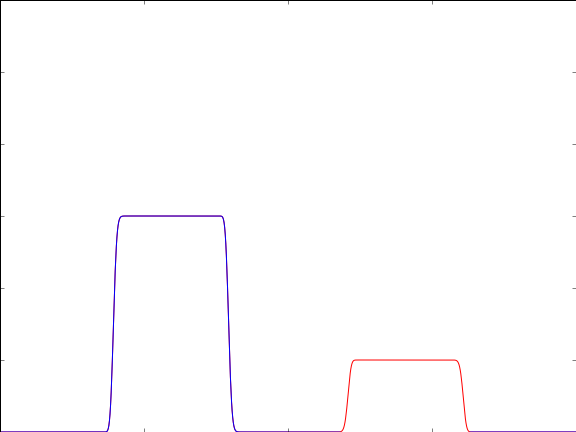
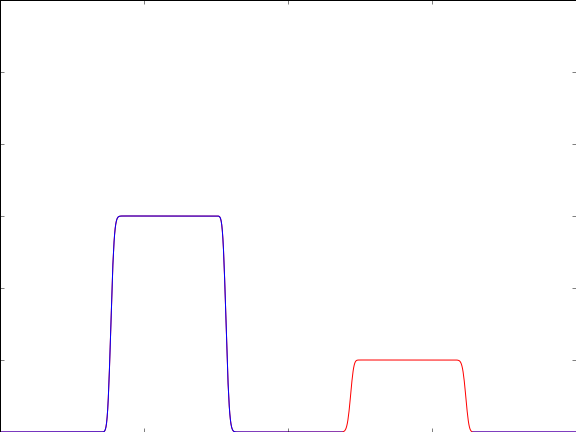
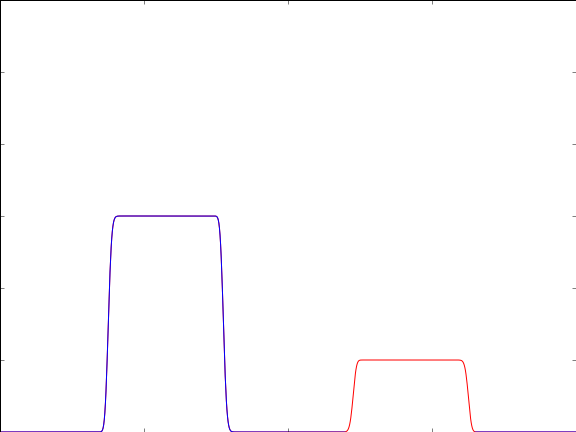
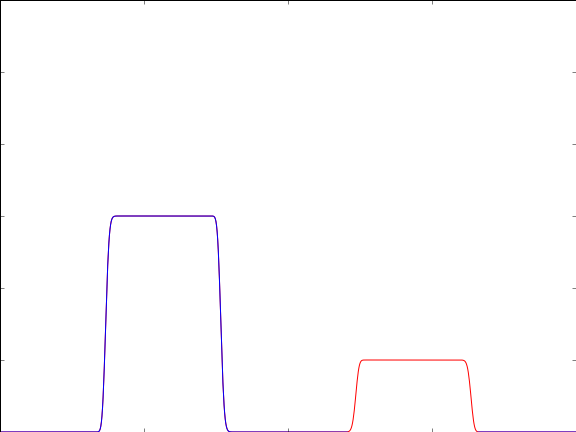
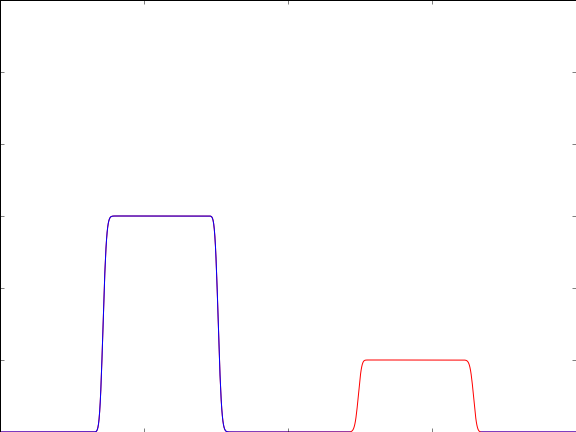
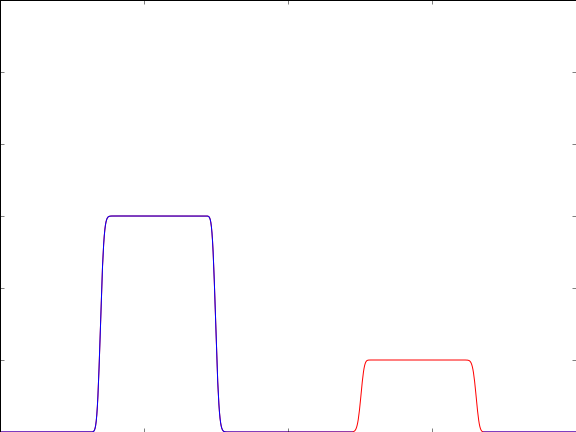
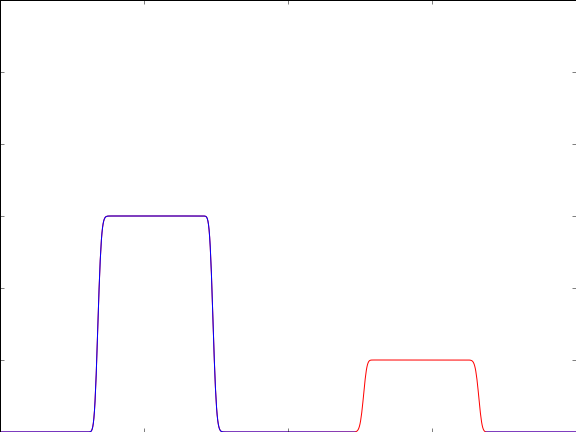
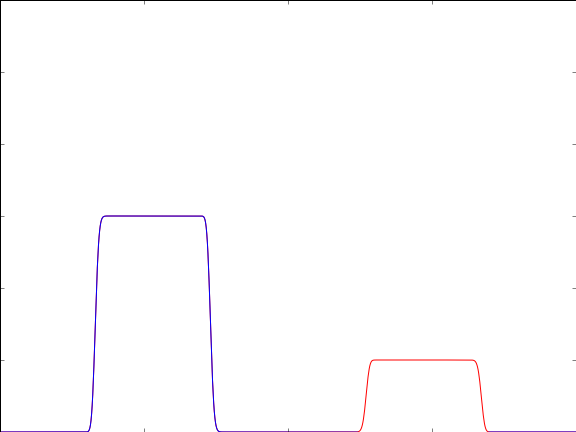
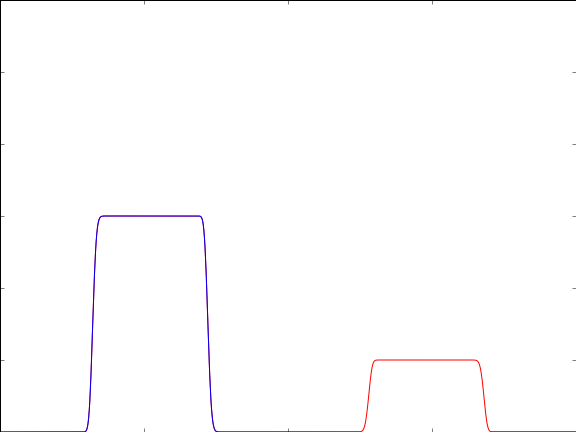
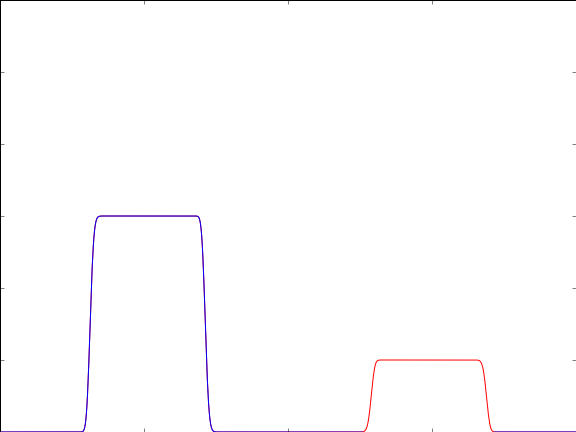
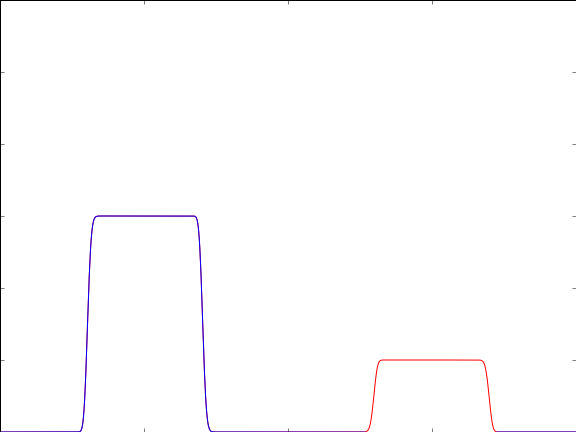
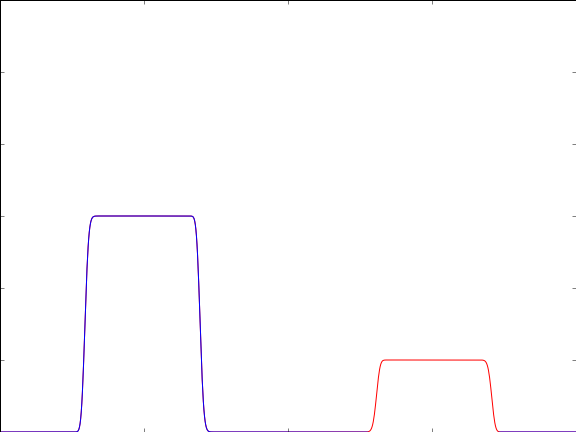
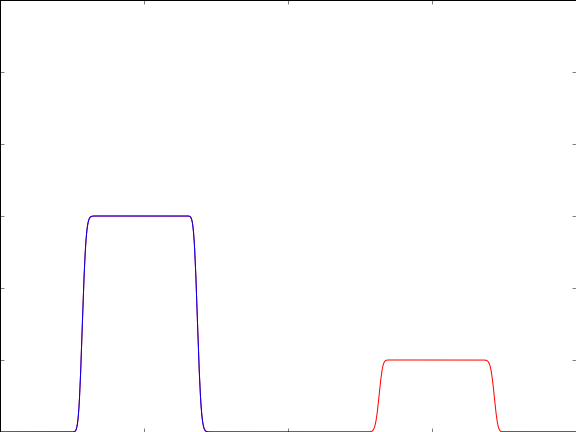
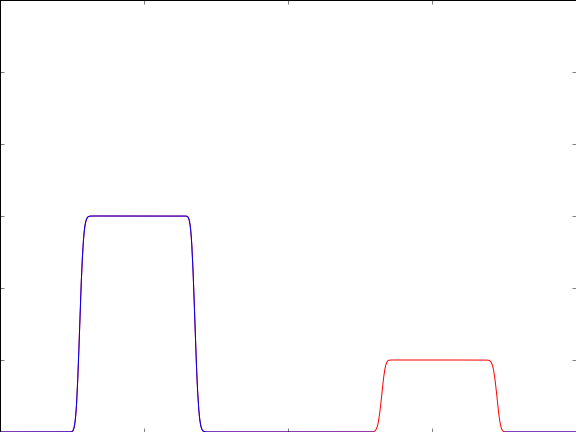
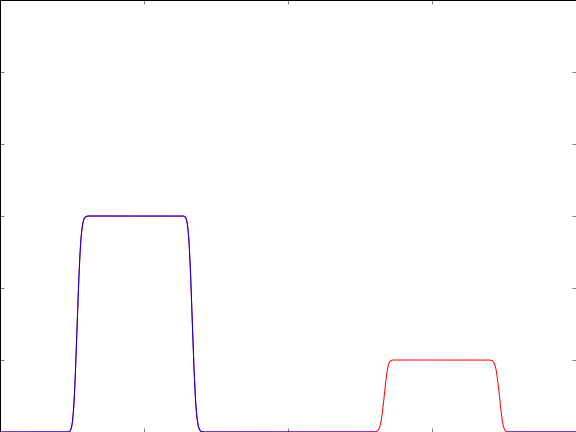
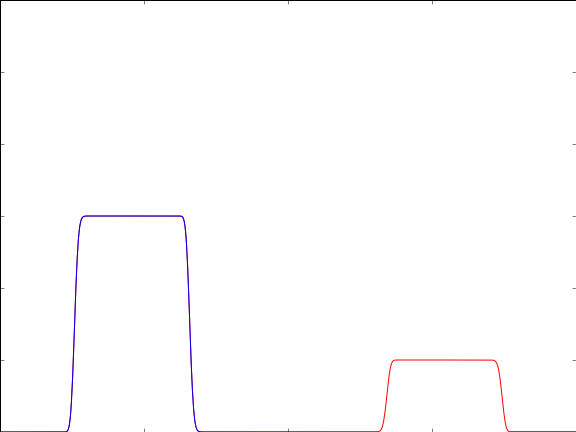
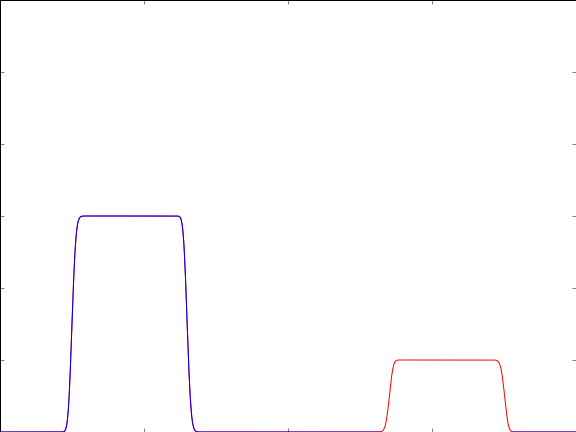
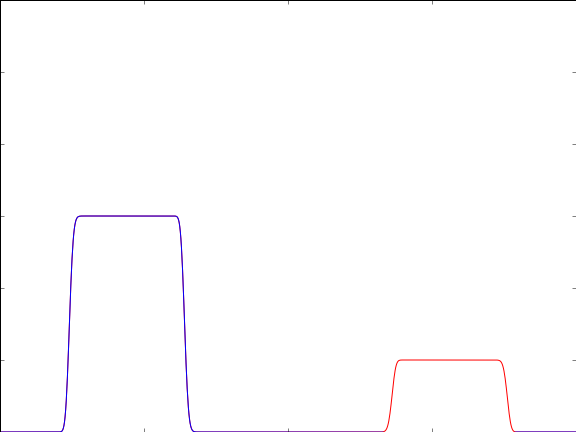
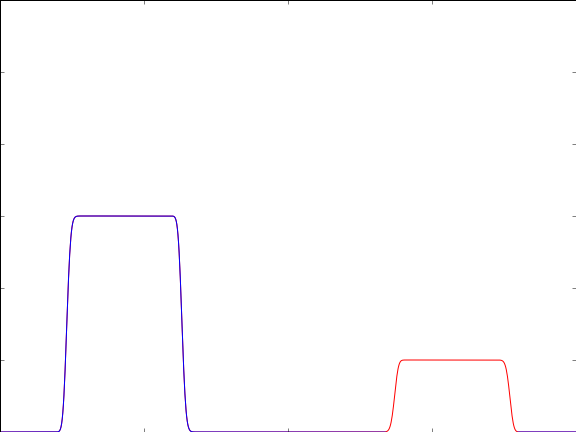
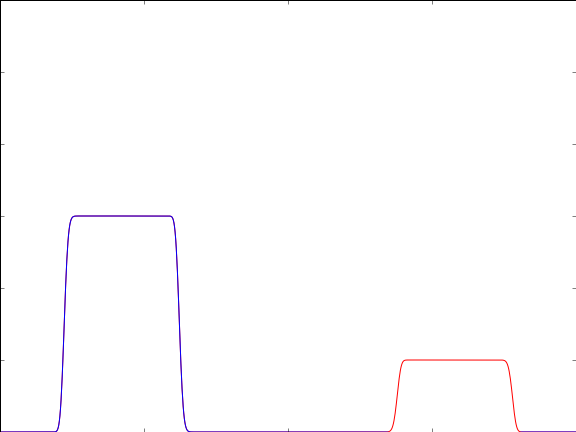
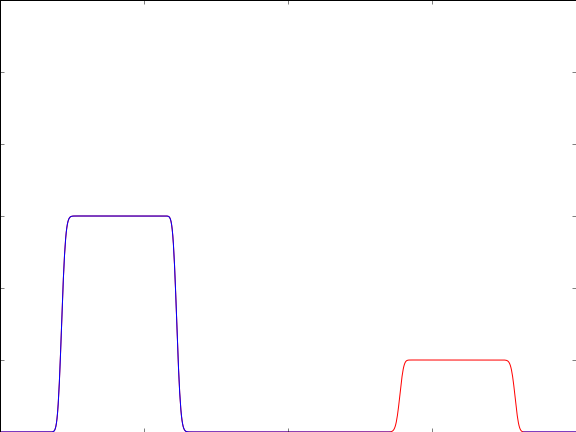
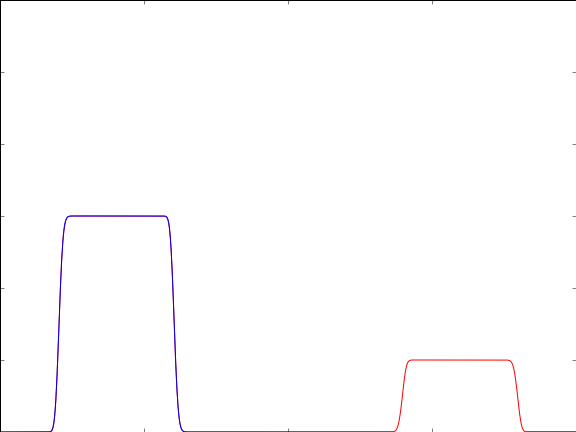
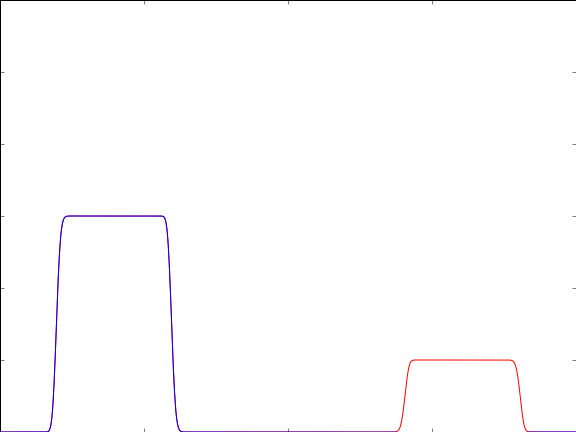
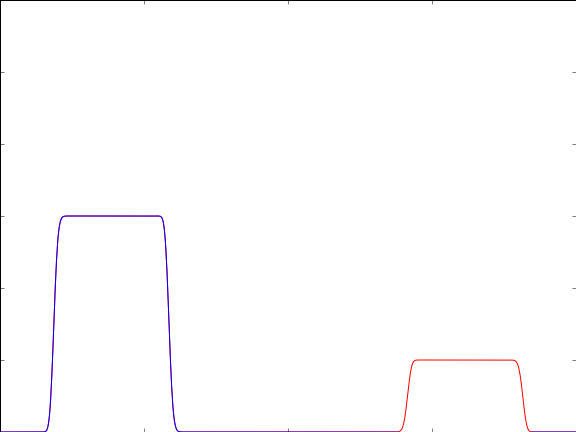
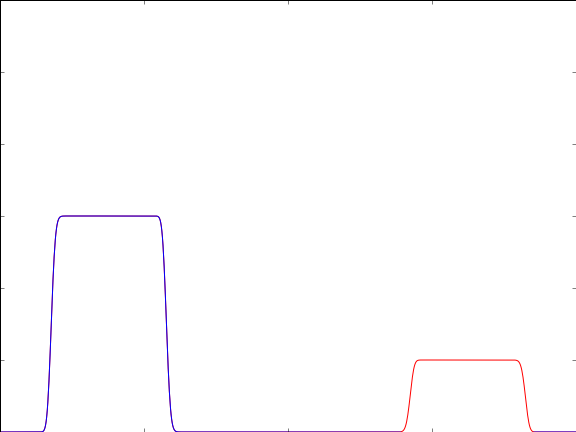
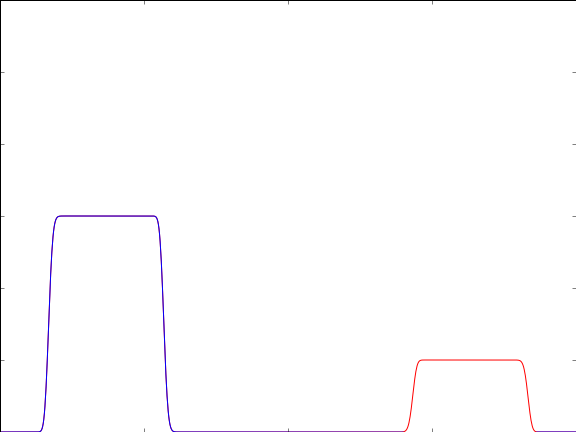
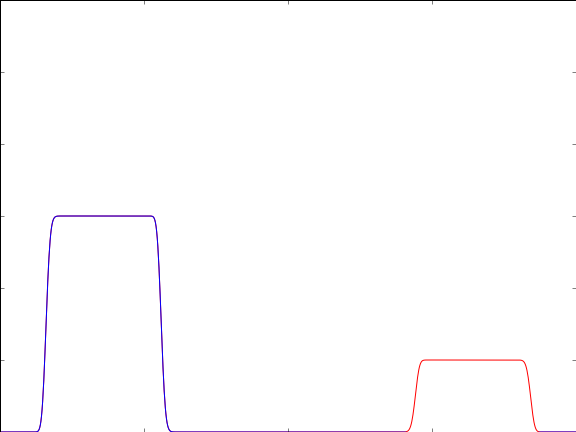
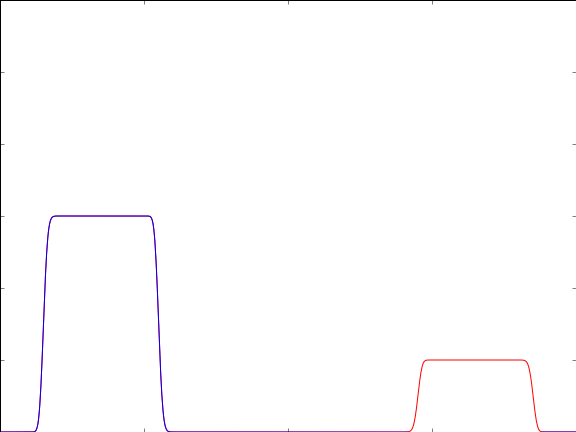
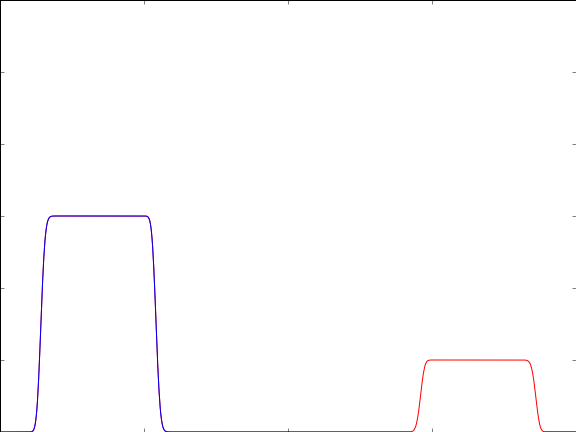
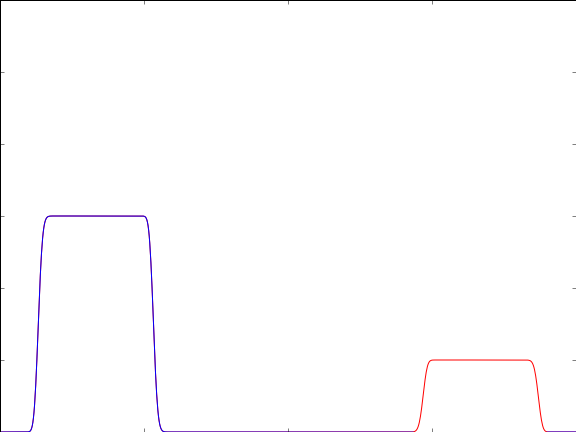
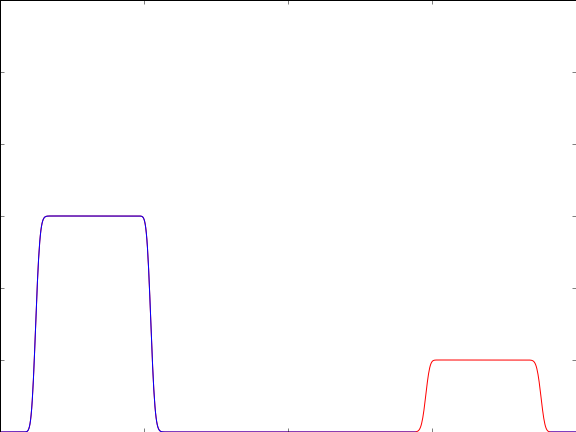
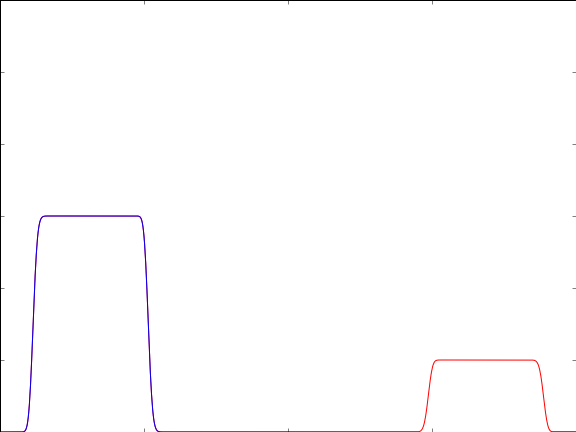
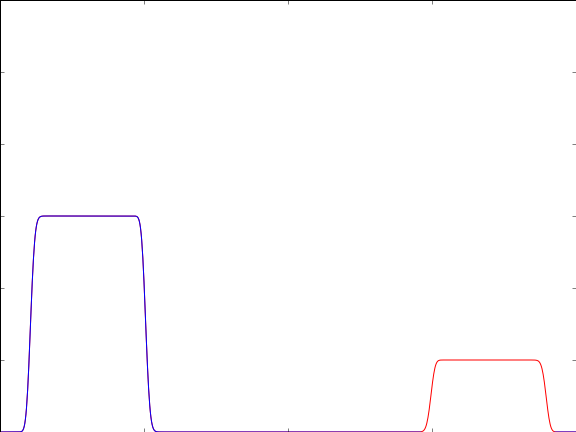
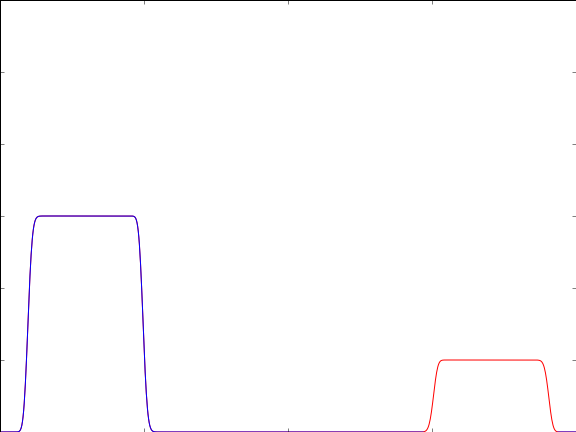
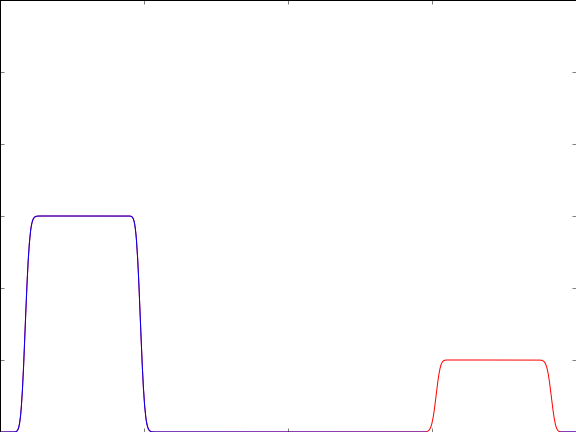
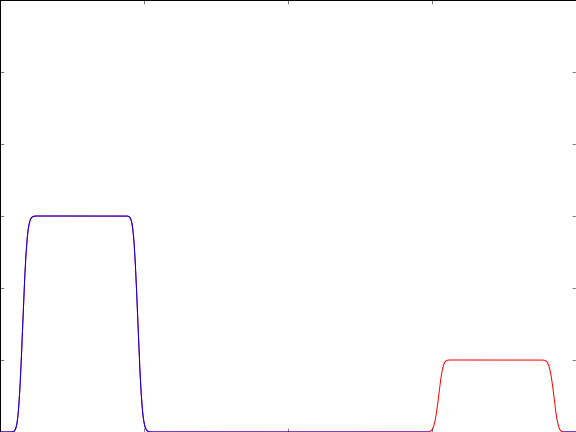
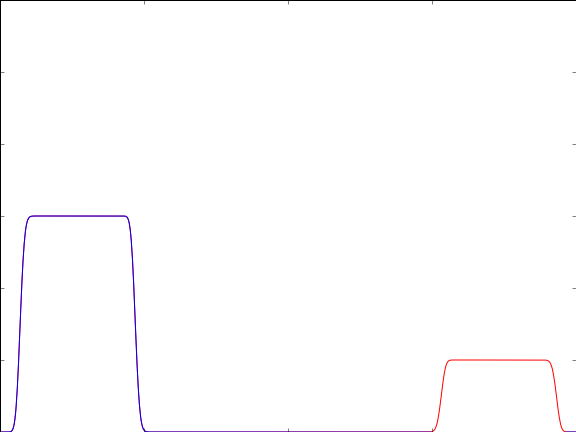
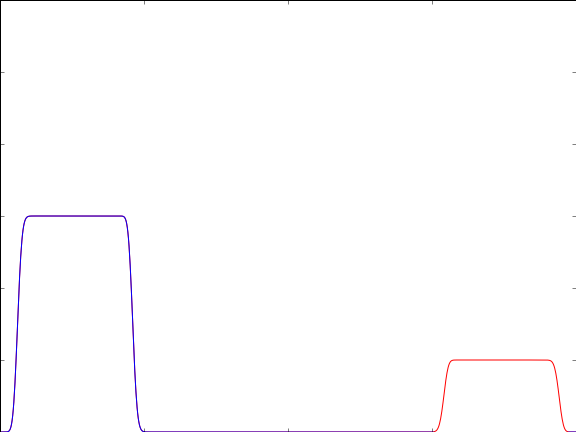
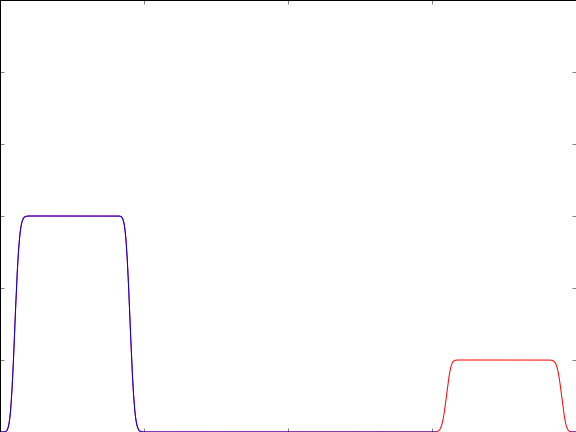
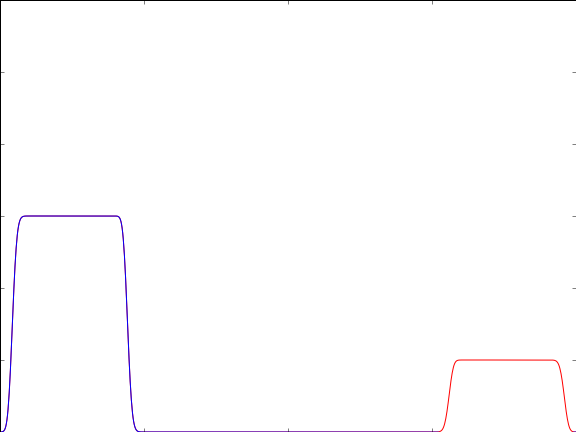
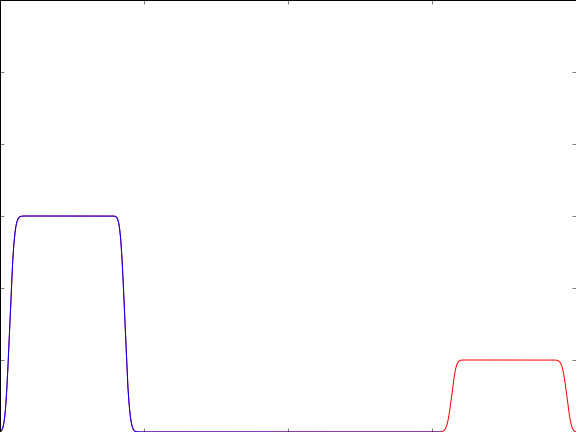
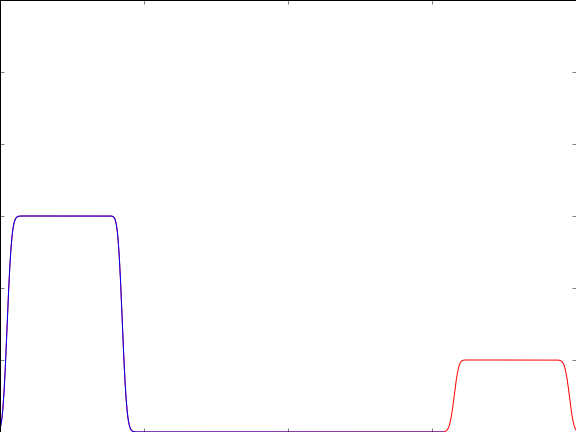
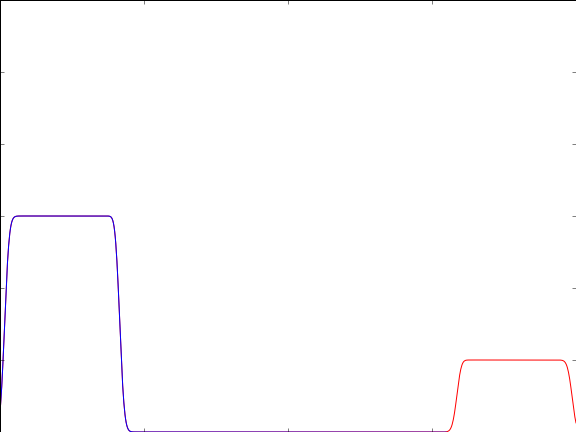
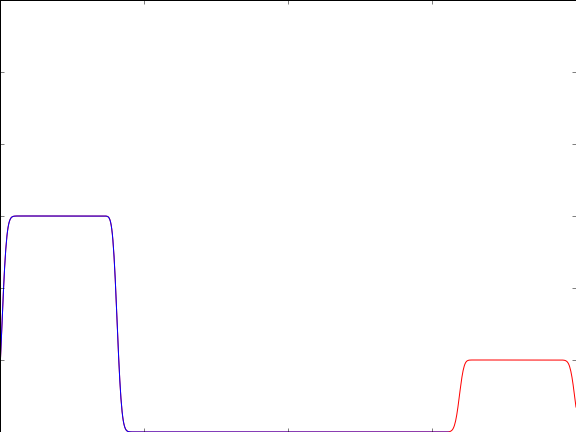
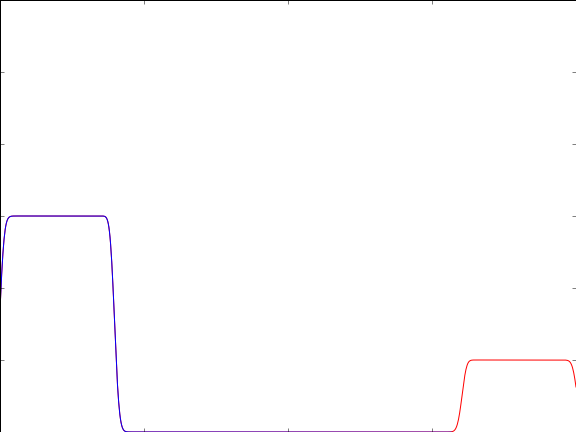
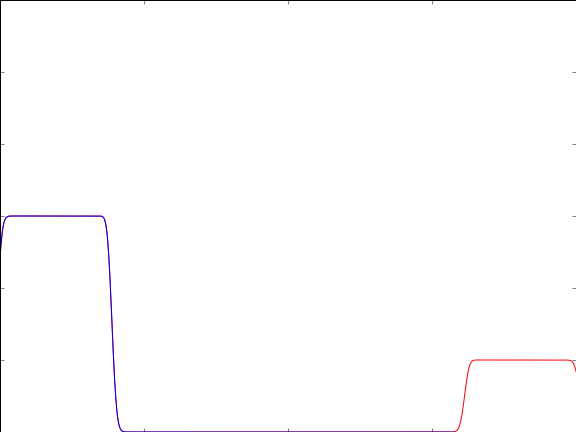
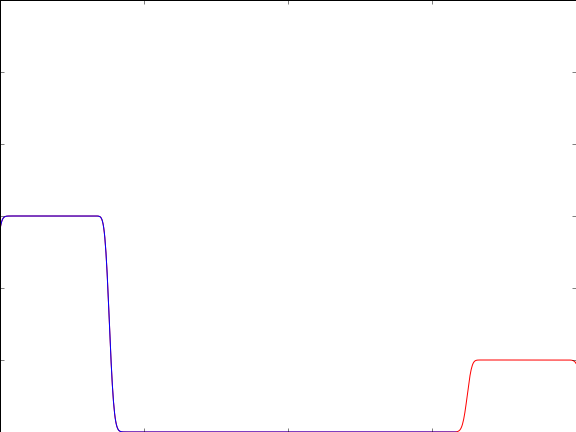
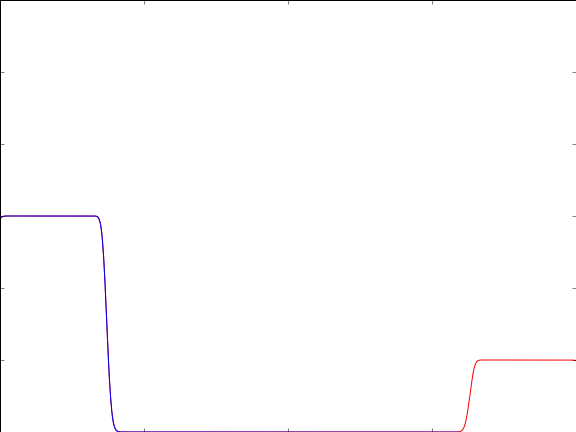
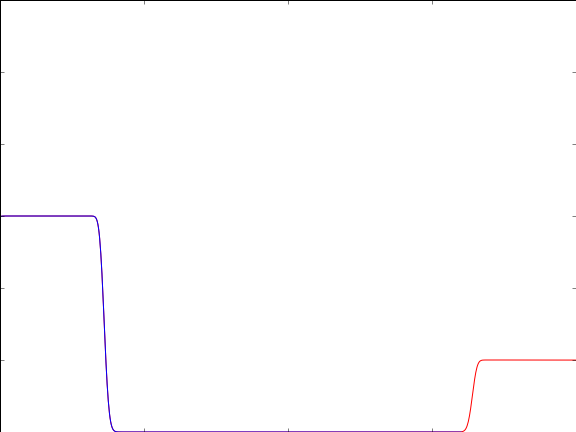
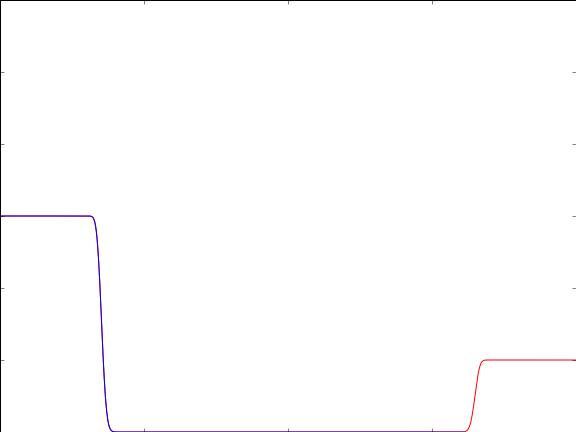
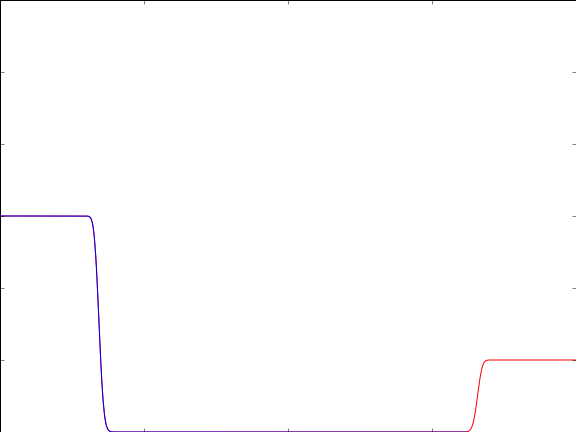
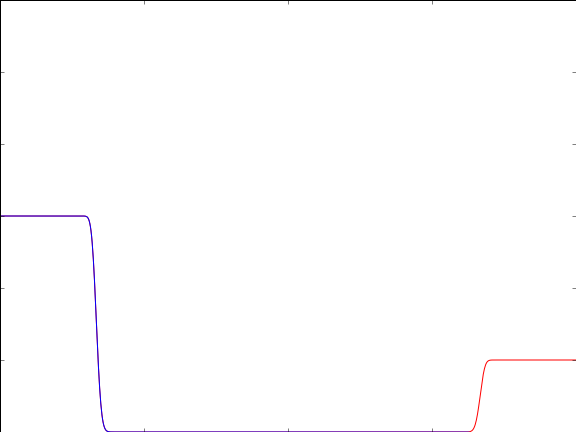
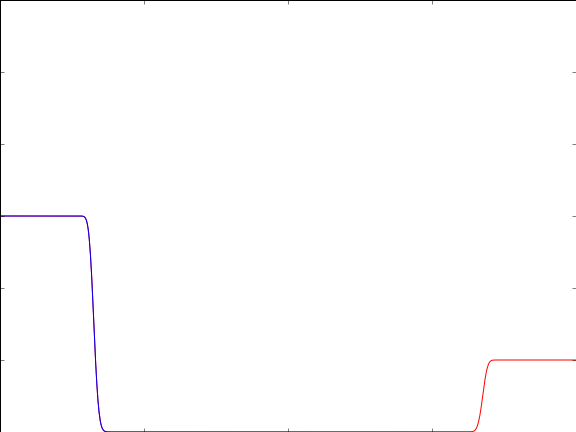
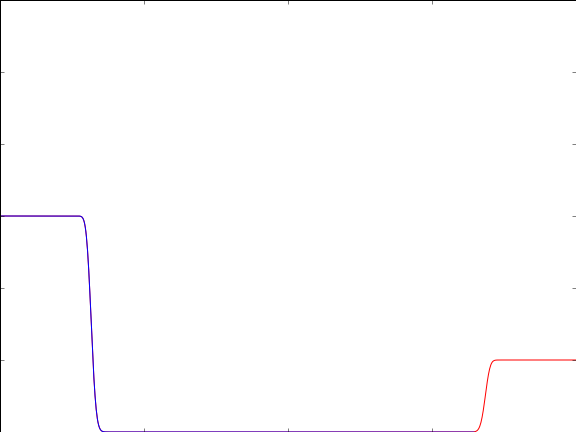
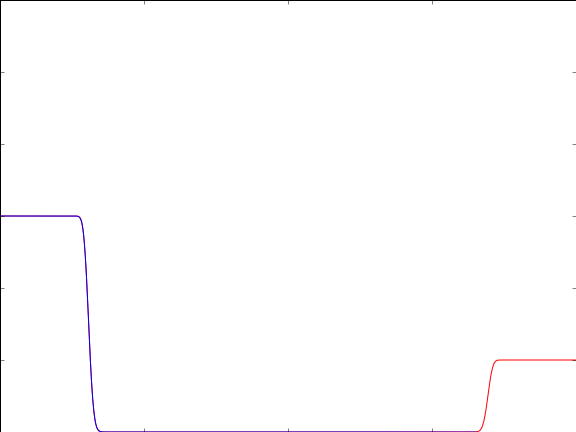
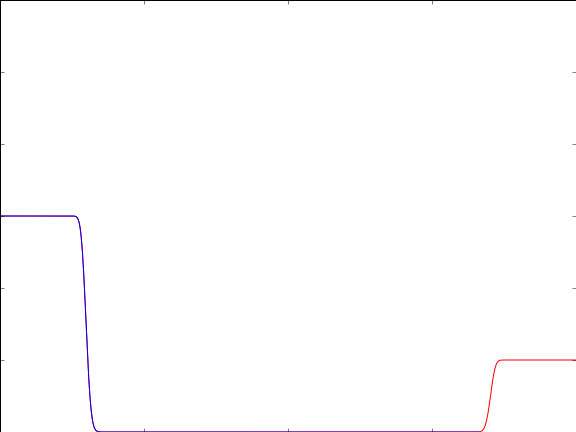
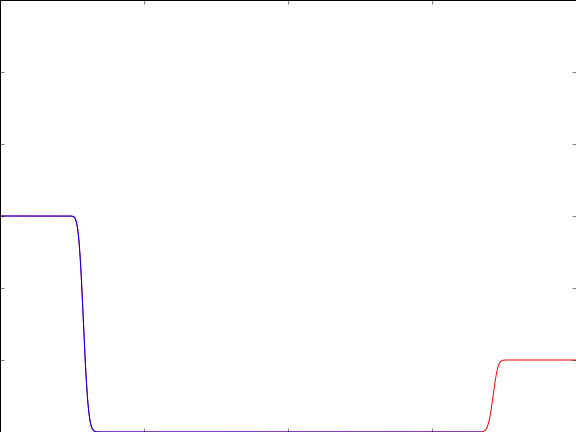
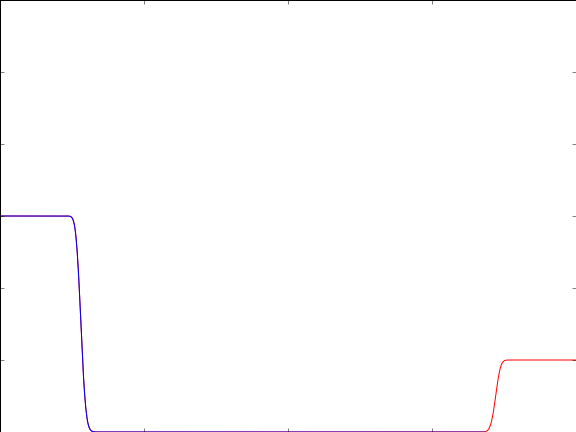
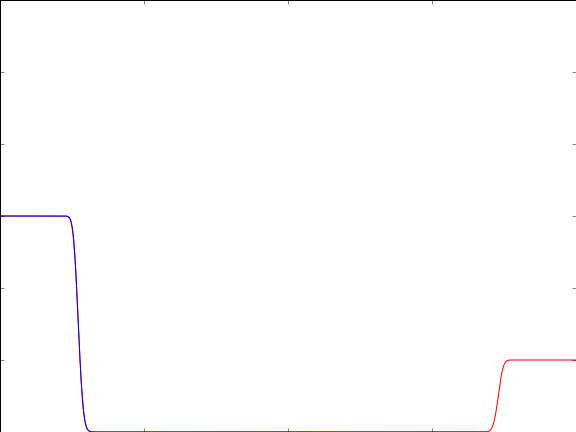
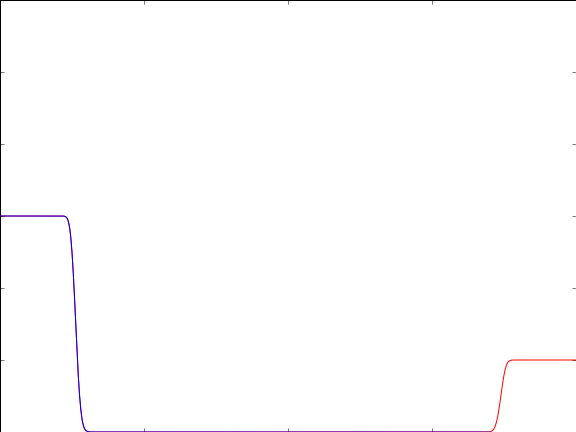
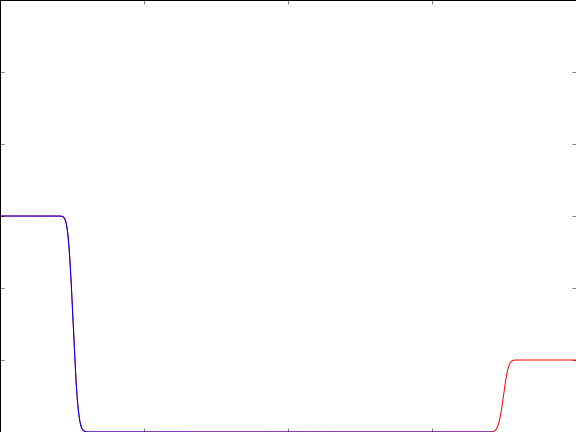
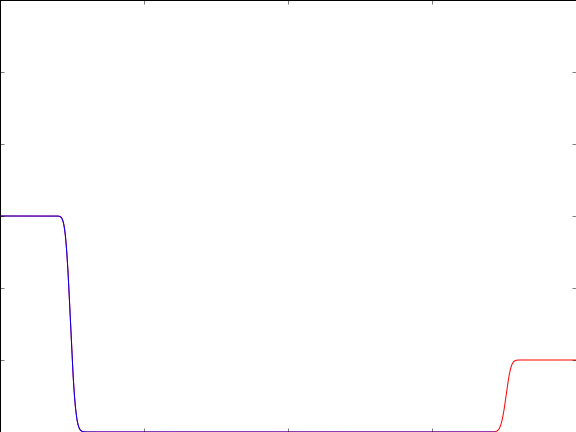
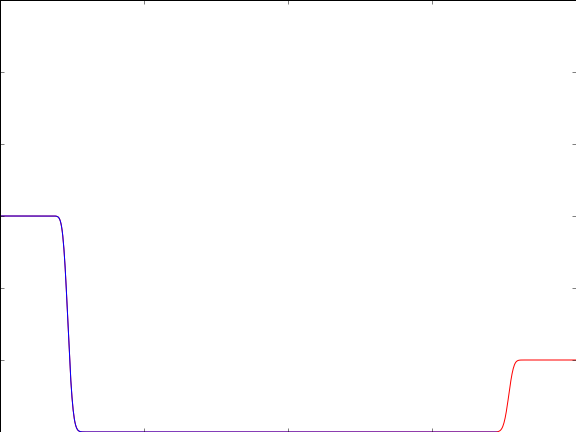
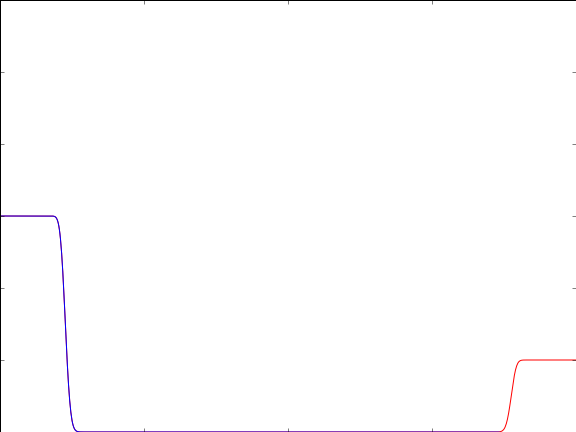
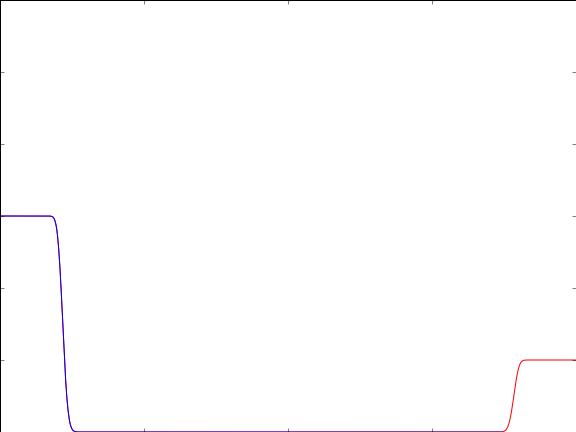
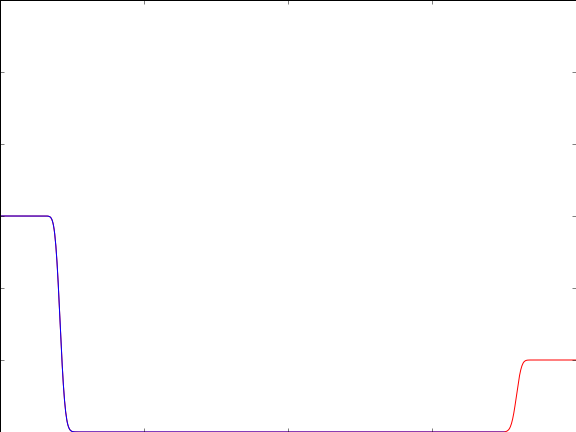
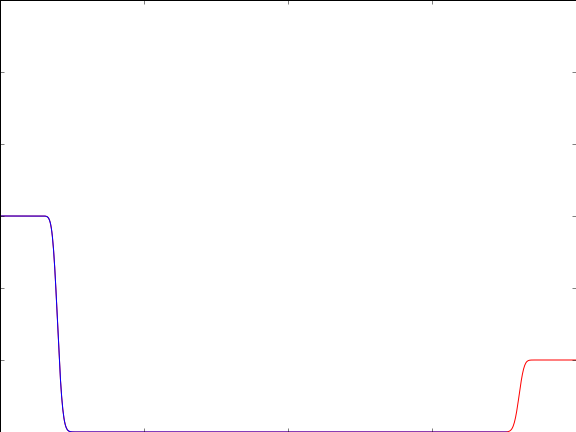
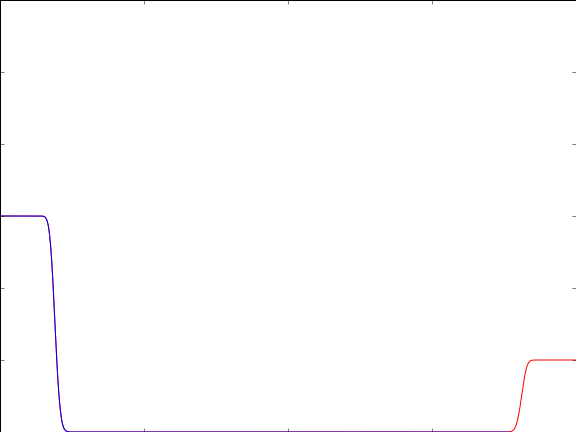
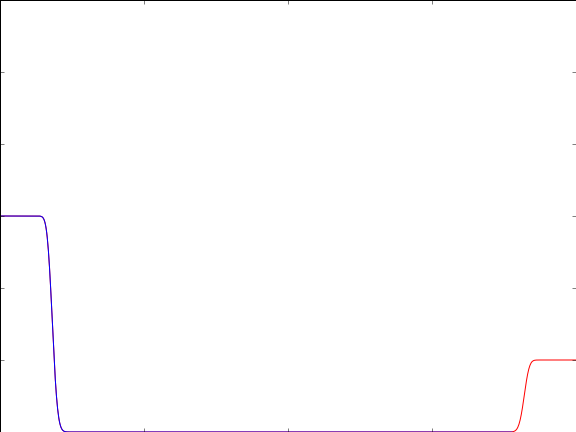
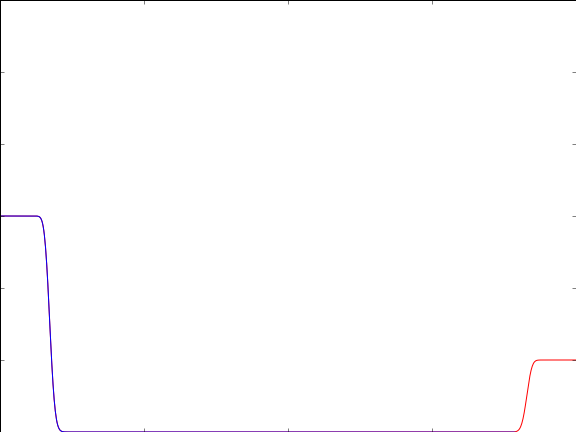
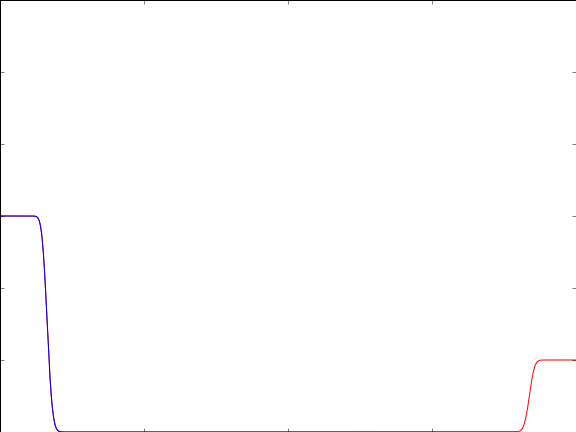
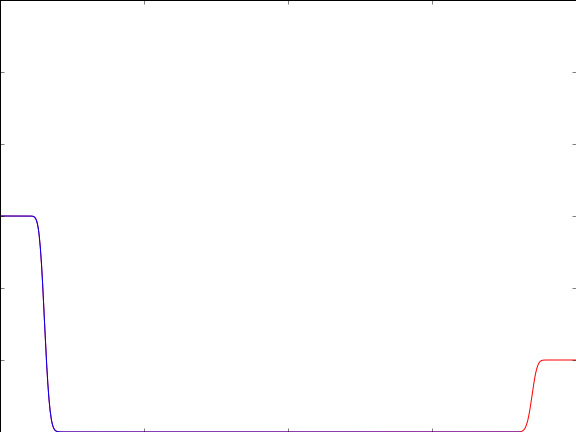
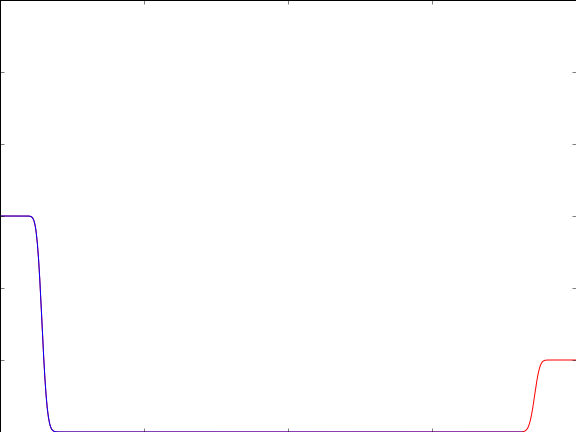
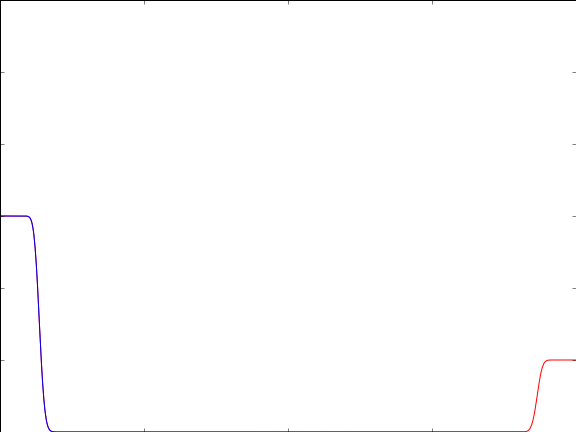
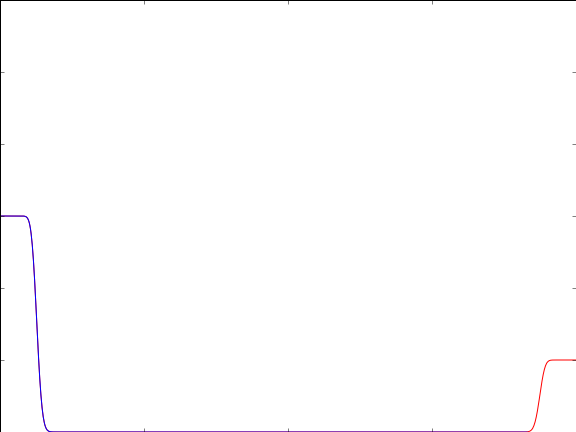
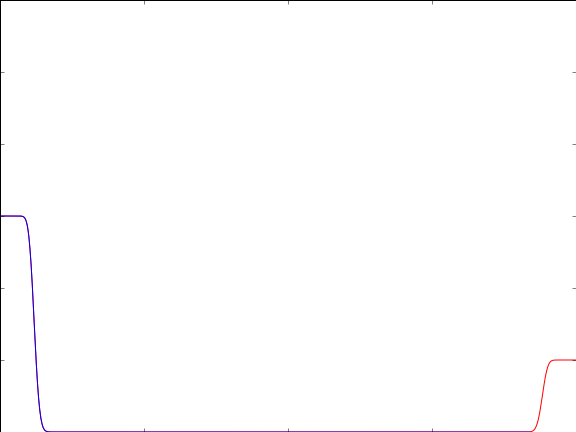
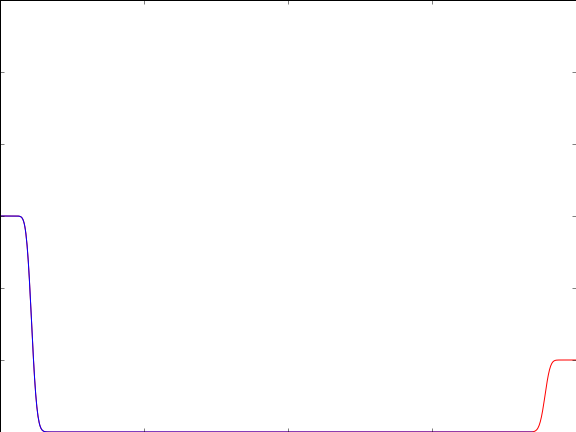
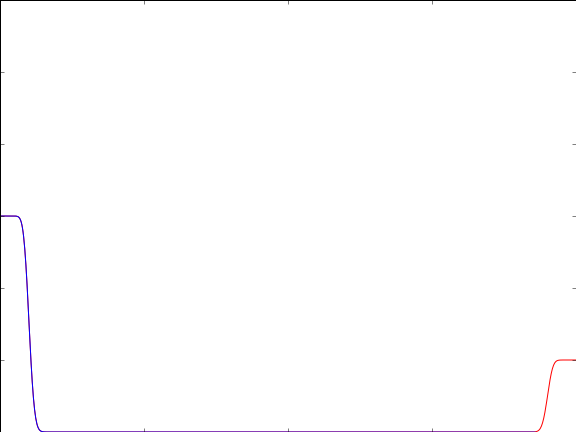
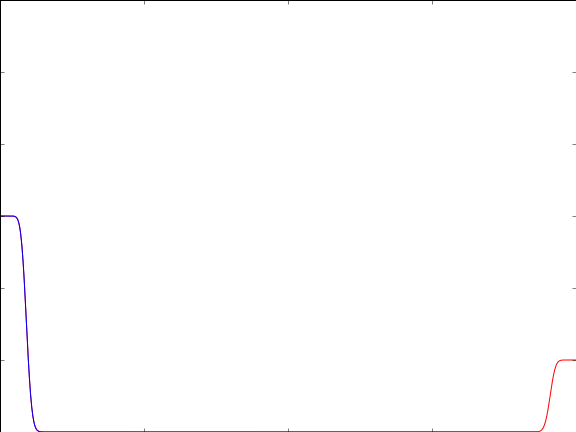
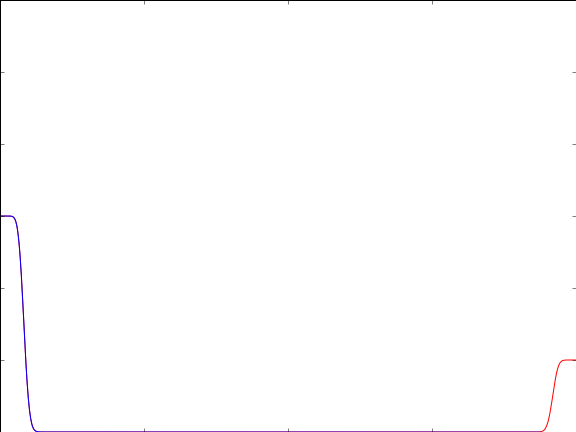
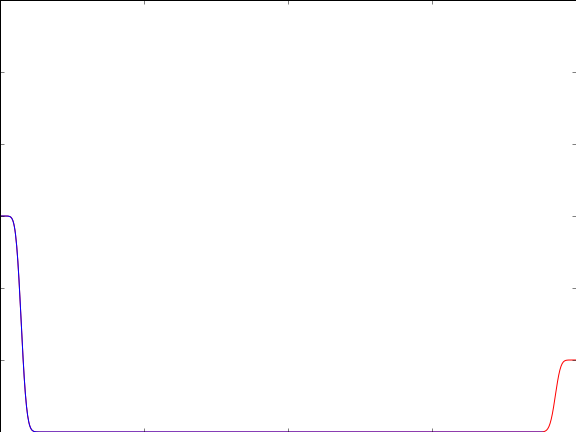
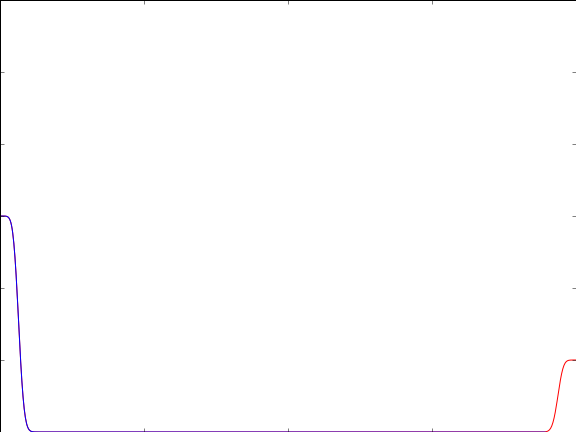
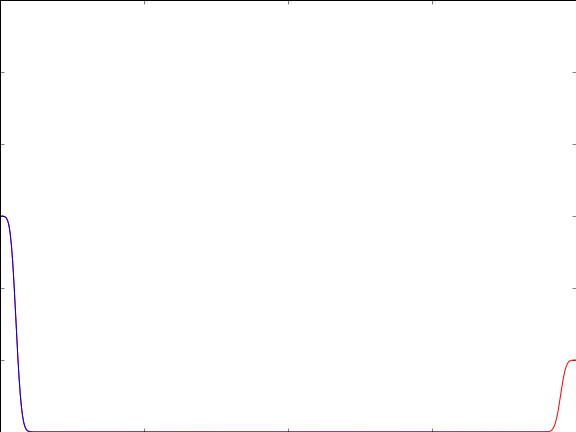
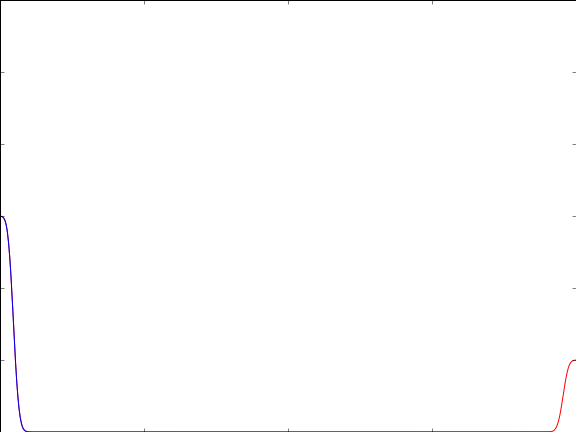
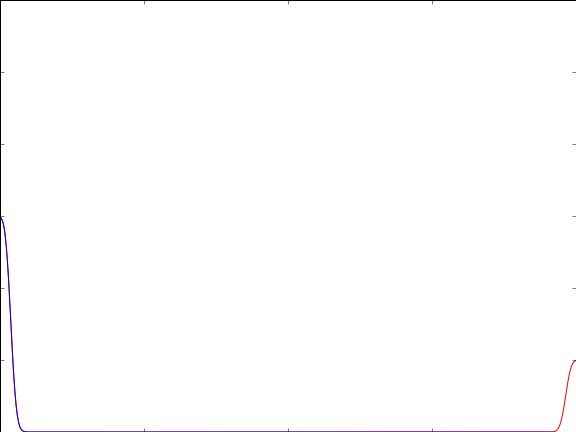
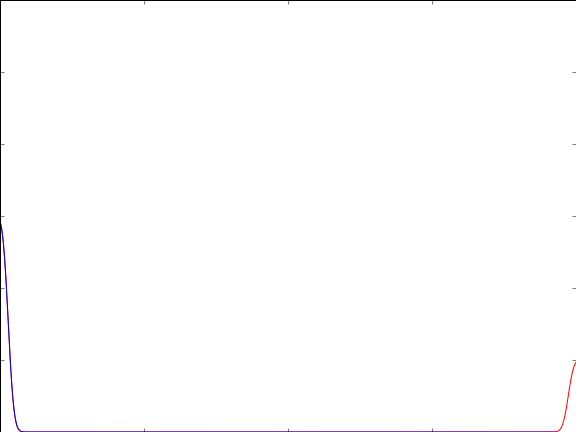
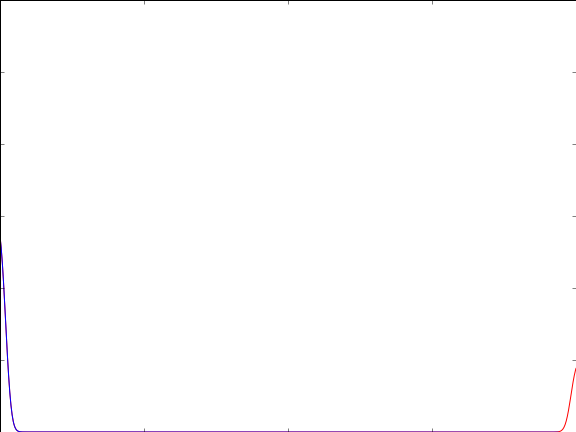
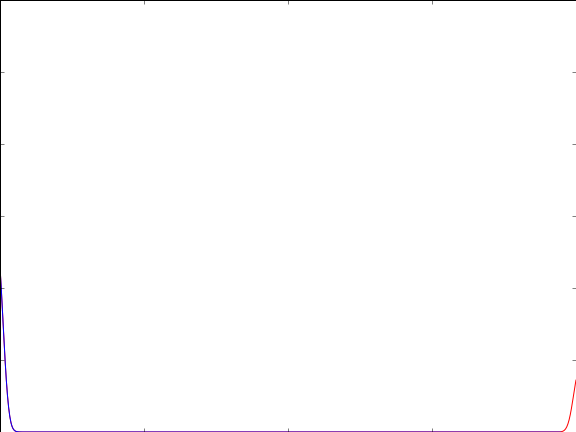
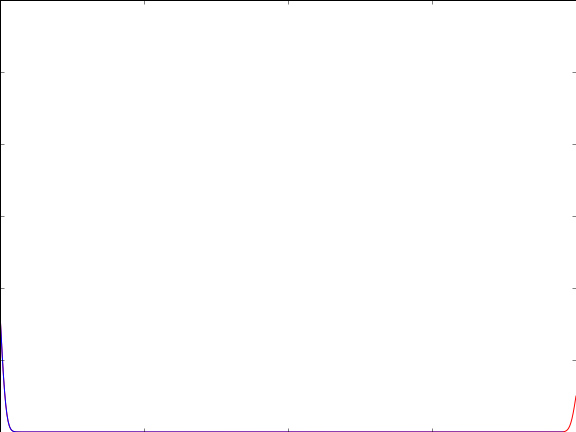
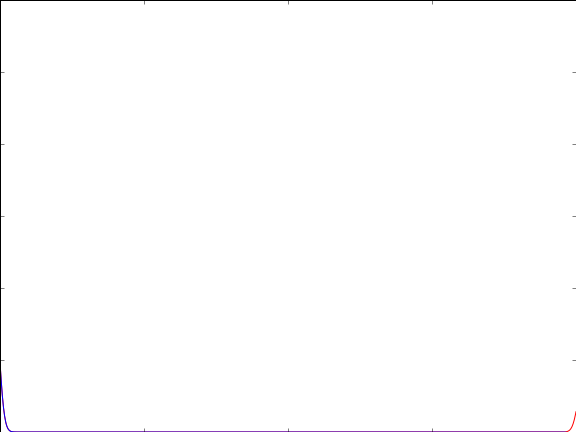
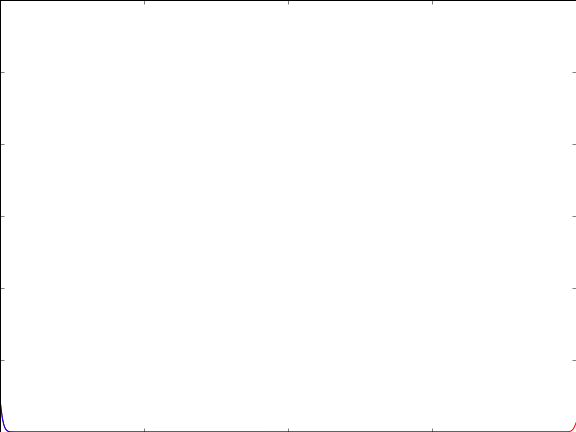
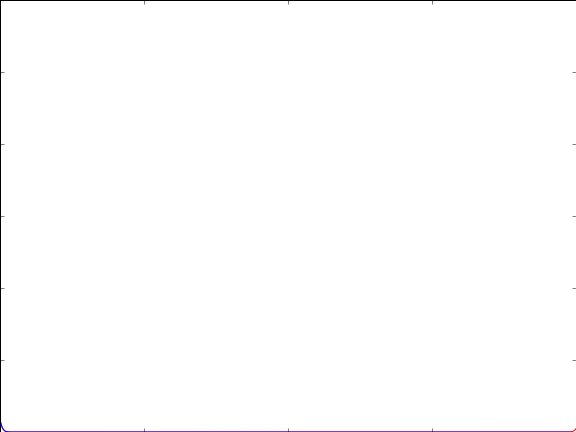
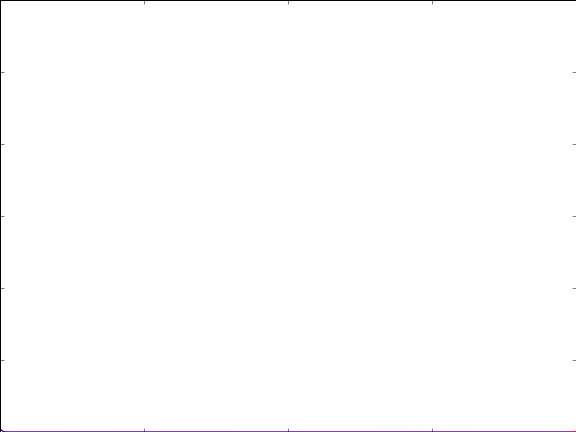
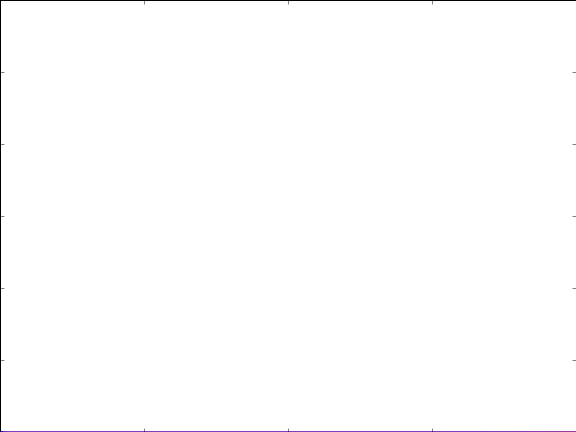
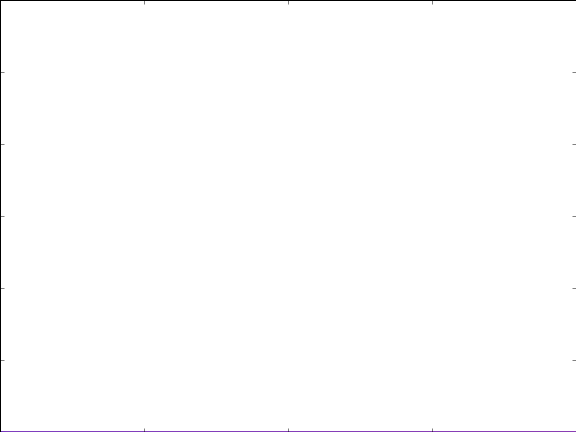
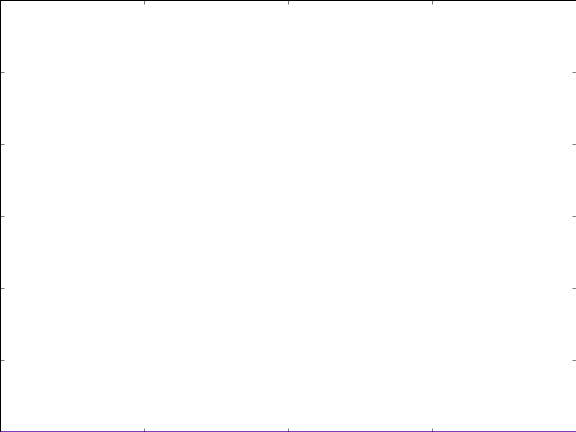
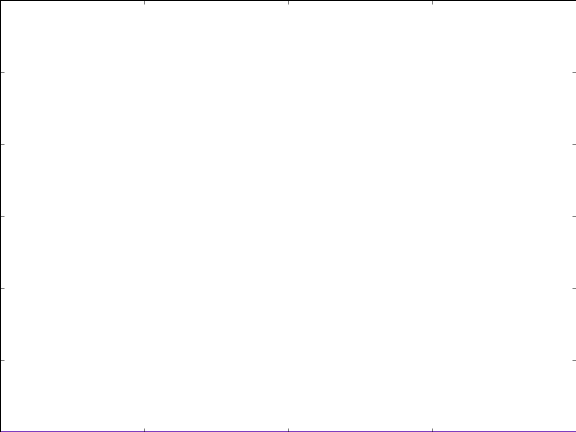
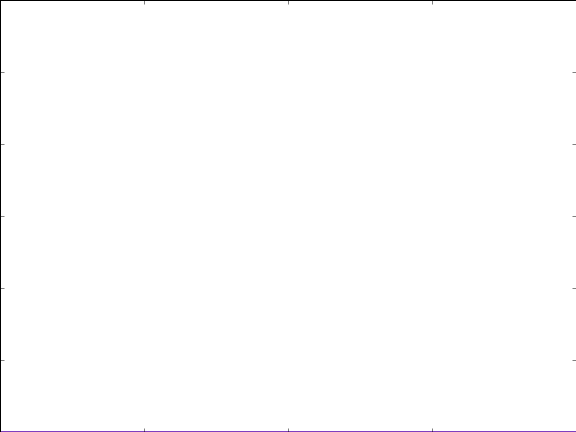
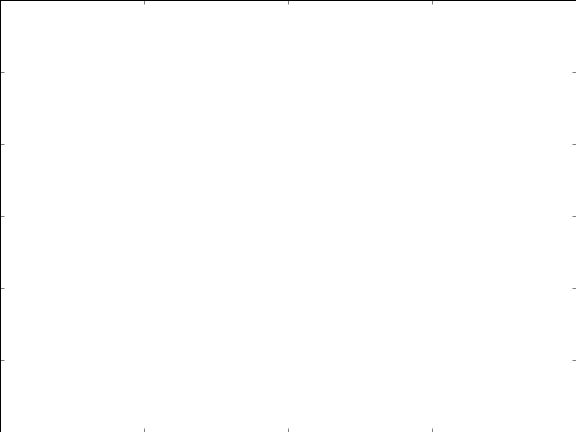
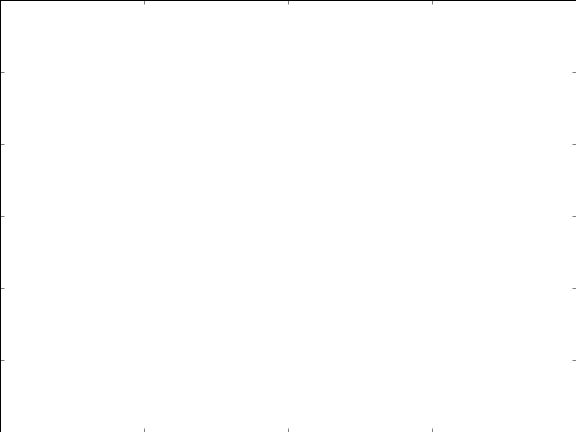

In [29]:
u = np.zeros(n+1) # решение
v = np.zeros(n+1)
for i in range(n+1):
    u[i] = 2*f(x[i])
    v[i] = f(x[i])
U = np.row_stack((u,v))
for i in range(n+1):
    U[:, i] = np.matmul(OMEGA_, U[:, i])
x = np.linspace(a, b, n+1) #сетка
j = 0
result = [[],[]]
for l in lam:
    c = l
    tau = h * X / m.fabs(c)
    t = 0
    num = 0
    result[j].append(list(U[j]))
    if c > 0:
        while np.any(U[j]):
            tmp = np.zeros(n+1)
            for i in range(1, n+1):
                tmp[i] = ( (U[j][i] - U[j][i-1]) * (x[i] - c * tau) + U[j][i-1] * x[i] - U[j][i] * x[i-1] ) / h
                if tmp[i] < 10e-10:
                    tmp[i] = 0
            U[j] = tmp[:]
            if num % 5 == 0:
                result[j].append(list(U[j]))
            t += tau
            num += 1
    else:
        while np.any(U[j]):
            tmp = np.zeros(n+1)
            for i in range(0, n):
                tmp[i] = ( (U[j][i+1] - U[j][i]) * (x[i] - c * tau) + U[j][i] * x[i + 1] - U[j][i + 1] * x[i] ) / h
                if tmp[i] < 10e-10:
                    tmp[i] = 0
            U[j] = tmp[:]
            if num % 5 == 0:
                result[j].append(list(U[j]))
            t += tau
            num += 1
    j += 1
    
length = len(result[0])
if length < len(result[1]):
    length = len(result[1])
for i in range(2):
    for j in range(len(result[i]), length):
        result[i].append(list(np.zeros(n+1)))


for i in range(length):
    tmp = np.array([result[0][i], result[1][i]])
    for j in range(n+1):
        tmp[:, j] = np.matmul(OMEGA, tmp[:, j])
    result [0][i] = list(tmp[0])
    result [1][i] = list(tmp[1])
    

fig = plt.figure(figsize=(8, 6))
axis = fig.add_axes([0, 0, 1, 1])

def animate(i):
    axis.clear()
    axis.plot(x, result[0][i], 'r', x, result[1][i], 'b')
    axis.axis([a, b, 0, 3])

def init():
    axis.plot(x, result[0][0], 'r', x, result[1][0], 'b')
    axis.axis([a, b, 0, 3])


animation.FuncAnimation(fig, animate, frames=len(result[0]), 
                        init_func=init,interval=300, blit=False)